In [1]:
%pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ synthesize==2.0

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
os.chdir("/Users/kwhiting/Library/CloudStorage/OneDrive-MemorialSloanKetteringCancerCenter/Projects/Li_Xuan_Qin/SyntheSize_py")
print(os.getcwd())


/Users/kwhiting/Library/CloudStorage/OneDrive-MemorialSloanKetteringCancerCenter/Projects/Li_Xuan_Qin/SyntheSize_py


In [3]:
import sys
sys.path.insert(0, os.path.join(os.getcwd(), "synthesize"))

In [15]:
%load_ext autoreload
%autoreload 2



# from tools import get_data_metrics, visualize, eval_classifier, vis_classifier
from tools import get_data_metrics, visualize, eval_classifier, vis_classifier, heatmap_eval, UMAP_eval
import pandas as pd
import numpy as np



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
os.chdir("/Users/kwhiting/Library/CloudStorage/OneDrive-MemorialSloanKetteringCancerCenter/Projects/Li_Xuan_Qin/SyntheSize_py/synthesize")
print(os.getcwd())

/Users/kwhiting/Library/CloudStorage/OneDrive-MemorialSloanKetteringCancerCenter/Projects/Li_Xuan_Qin/SyntheSize_py/synthesize


# Our Data

In [ ]:
# # === Input Real Data Description ===
# # - 'samples': sample IDs (need to be removed)
# # - 'groups': class labels (string or numeric; mapped to 0/1 if needed)
# # - All other columns: raw feature values (e.g., expression counts)
# # - The feature values in real need to be log-transformed: log2(real + 1)
# real_file_name = r"./Case/LIHCSubtypeFamInd_test74_DESeq.csv" # Please replace it with your actual file path

# # === Input Generated Data Description ===
# # - generated.csv has the same columns as real except for samples
# # - The features are already log-transformed
# # - Group labels (0 or 1) are in the last column
# generated_file_name = r"./Case/LIHCSubtypeFamInd_train294_DESeq_epochES_batch01_CVAE1-10_generated.csv" # Please replace it with your actual file path

# # Load and preprocess real and generated datasets:
# # - real_data: log2-transformed numeric features from the real dataset
# # - groups_real: binary-encoded labels (0/1) for the real data
# # - generated_data: numeric features from the generated dataset
# # - groups_generated: group labels from the generated data
# # - unique_types: array of unique class labels (e.g., [0, 1])
# real, groups_real, generated, groups_generated, unique_types = get_data_metrics(real_file_name, generated_file_name)


In [ ]:

# Visualize and evaluate real vs. generated data:
# - Stratified sampling is performed within each group based on the real data
# - 'ratio' determines the fraction of real samples to visualize per class
# - Heatmaps show the expression patterns of both datasets
# - UMAP plots show group-wise structure in 2D space
# - If generated data is None, only real data is visualized
#visualize(real, groups_real, unique_types, generated, groups_generated, ratio=1, seed=88)

In [7]:
# === Input Real Data Description ===
# - 'samples': sample IDs (need to be removed)
# - 'groups': class labels (string or numeric; mapped to 0/1 if needed)
# - All other columns: raw feature values (e.g., expression counts)
# - The feature values in real need to be log-transformed: log2(real + 1)
real_file_name = r"./Case/processed_train_136_full_model_data.csv" # Please replace it with your actual file path

# === Input Generated Data Description ===
# - generated.csv has the same columns as real except for samples
# - The features are already log-transformed
# - Group labels (0 or 1) are in the last column
generated_file_name = r"./Case/processed_train_136_full_model_data_epochES_batch01_CVAE1-5_generated.csv" # Please replace it with your actual file path


# Load and preprocess real and generated datasets:
# - real_data: log2-transformed numeric features from the real dataset
# - groups_real: binary-encoded labels (0/1) for the real data
# - generated_data: numeric features from the generated dataset
# - groups_generated: group labels from the generated data
# - unique_types: array of unique class labels (e.g., [0, 1])
real, groups_real, generated, groups_generated, unique_types = get_data_metrics(real_file_name, generated_file_name)


/Users/kwhiting/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log2


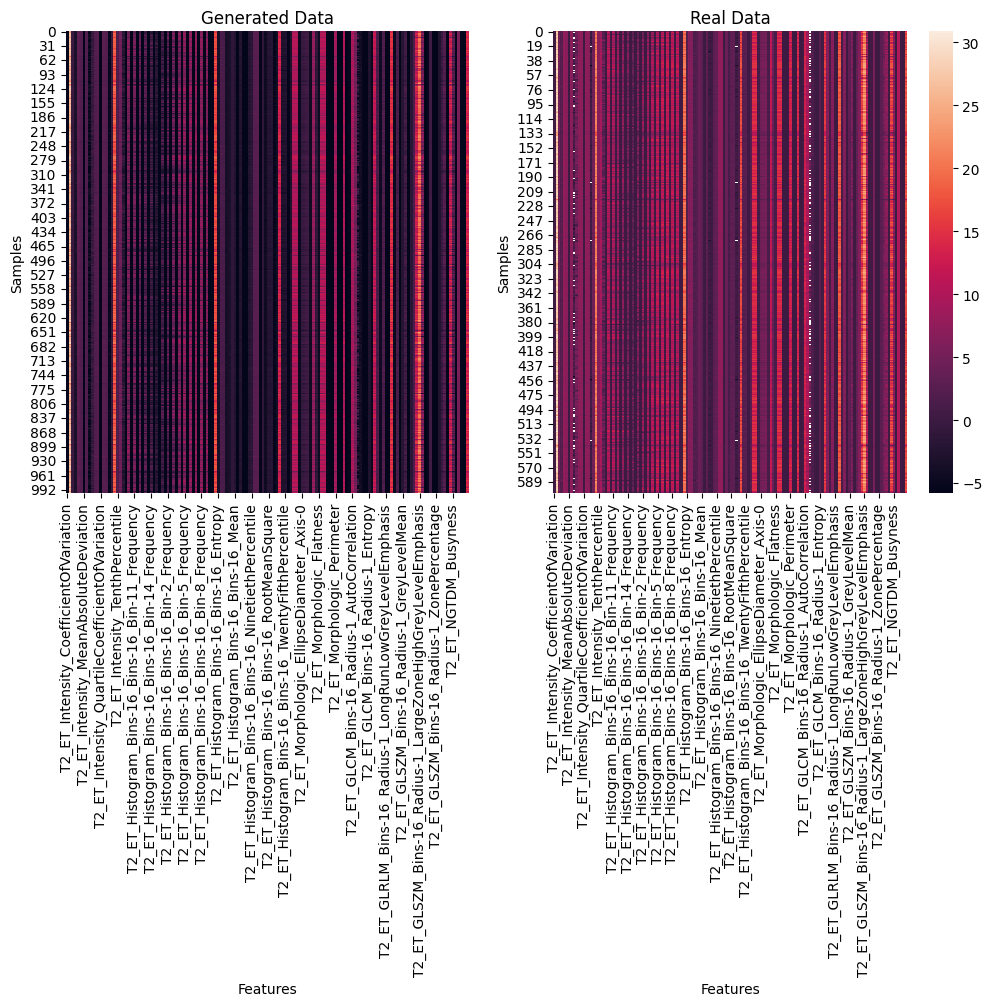

In [ ]:
heatmap_eval(real, generated)


/Users/kwhiting/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.


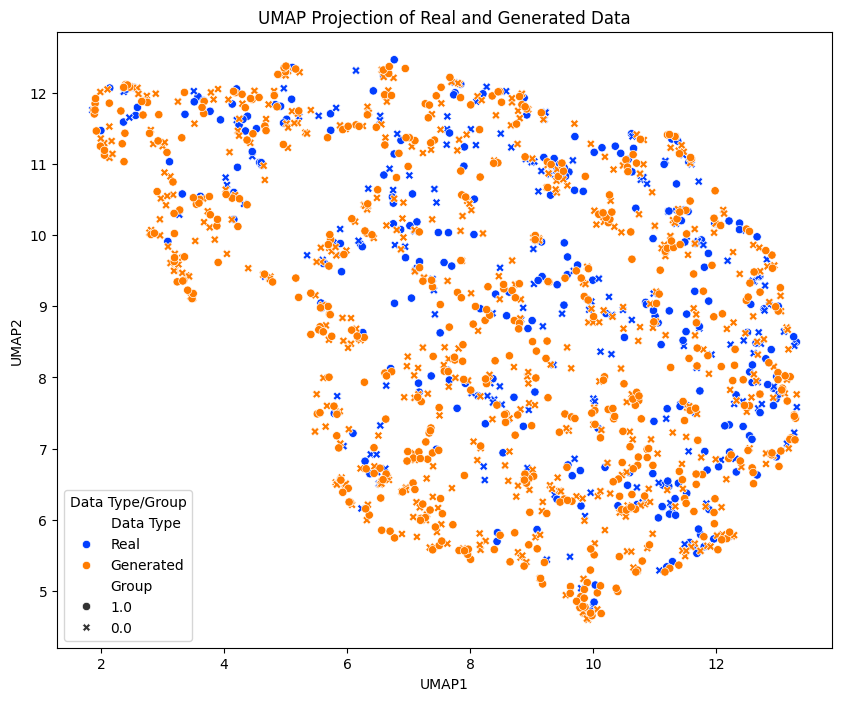

In [22]:
# Drop NaNs in real data
mask_real = ~real.isna().any(axis=1)  # True for rows without NaNs
real_clean = real[mask_real]
groups_real_clean = groups_real[mask_real]

# Drop NaNs in generated data
mask_generated = ~generated.isna().any(axis=1)  # True for rows without NaNs
generated_clean = generated[mask_generated]
groups_generated_clean = groups_generated[mask_generated]

UMAP_eval(
    dat_real=real_clean,
    dat_generated=generated_clean,
    groups_real=groups_real_clean,
    groups_generated=groups_generated_clean,
    legend_pos="bottom")



In [19]:
import pandas as pd

# Count missing values in each column
missing_counts = real.isna().sum()

# Display columns that actually have missing values
print(missing_counts[missing_counts > 0])

T2_ET_Intensity_MedianAbsoluteDeviation      77
T2_ET_Intensity_Skewness                     10
T2_ET_Histogram_Bins-16_Bins-16_Skewness      9
T2_ET_GLCM_Bins-16_Radius-1_ClusterShade    163
dtype: int64


In [ ]:

print(generated.isna().sum())

In [14]:
def heatmap_eval(dat_real,dat_generated=None):
    r"""
    This function creates a heatmap visualization comparing the generated data and the real data.
    dat_generated is applicable only if 2 sets of data is available.

    Parameters
    -----------
    dat_real: pd.DataFrame
            the original copy of the data
    dat_generated : pd.DataFrame, optional
            the generated data
    
    """
    if dat_generated is None:
        # Only plot dat_real if dat_generated is None
        plt.figure(figsize=(6, 6))
        sns.heatmap(dat_real, cbar=True)
        plt.title('Real Data')
        plt.xlabel('Features')
        plt.ylabel('Samples')
    else:
        # Plot both dat_generated and dat_real side by side
        fig, axs = plt.subplots(ncols=2, figsize=(12, 6),
                                gridspec_kw=dict(width_ratios=[0.5, 0.55]))

        sns.heatmap(dat_generated, ax=axs[0], cbar=False)
        axs[0].set_title('Generated Data')
        axs[0].set_xlabel('Features')
        axs[0].set_ylabel('Samples')

        sns.heatmap(dat_real, ax=axs[1], cbar=True)
        axs[1].set_title('Real Data')
        axs[1].set_xlabel('Features')
        axs[1].set_ylabel('Samples')


In [15]:

def visualize(real_data, groups_real, unique_types, generated_data=None, groups_generated=None, ratio=1, seed=42):
    """
    Visualize real and optionally generated data using heatmap and UMAP projections.

    Supports both binary and multi-class settings. For each class, samples from both datasets
    are drawn based on real data class proportions.

    Parameters
    ----------
    real_data : pd.DataFrame
        Feature matrix of real dataset (without 'groups' column).
    groups_real : pd.Series
        Group labels for the real dataset.
    unique_types : array-like
        Unique class labels to iterate over.
    generated_data : pd.DataFrame, optional
        Feature matrix of generated dataset (same columns as real_data).
    groups_generated : pd.Series, optional
        Group labels for the generated dataset.
    ratio : float, default=1
        Sampling ratio within each class (based on real data).
    seed : int, default=42
        Random seed for reproducibility.
    """
    np.random.seed(seed)

    real_indices = []
    generated_indices = []

    for group in unique_types:
        # Sample from real
        real_idx = np.where(groups_real == group)[0]
        n_sample = round(len(real_idx) * ratio)
        sampled_real = np.random.choice(real_idx, size=n_sample, replace=False)
        real_indices.extend(sampled_real.tolist())

        # Sample from generated if provided
        if generated_data is not None and groups_generated is not None:
            gen_idx = np.where(groups_generated == group)[0]
            if len(gen_idx) < n_sample:
                raise ValueError(f"Not enough samples in generated data for group '{group}'")
            sampled_gen = np.random.choice(gen_idx, size=n_sample, replace=False)
            generated_indices.extend(sampled_gen.tolist())

    # Heatmap
    if generated_data is None:
        heatmap_eval(dat_real=real_data.iloc[real_indices, :])
    else:
        heatmap_eval(
            dat_real=real_data.iloc[real_indices, :],
            dat_generated=generated_data.iloc[generated_indices, :]
        )

        # UMAP
        # UMAP_eval(
        #     dat_real=real_data.iloc[real_indices, :],
        #     dat_generated=generated_data.iloc[generated_indices, :],
        #     groups_real=groups_real.iloc[real_indices],
        #     groups_generated=groups_generated.iloc[generated_indices],
        #     legend_pos="bottom"
        # )




In [16]:
visualize(real, groups_real, unique_types, generated, groups_generated, ratio=1, seed=88)


NameError: name 'plt' is not defined

In [11]:

# Visualize and evaluate real vs. generated data:
# - Stratified sampling is performed within each group based on the real data
# - 'ratio' determines the fraction of real samples to visualize per class
# - Heatmaps show the expression patterns of both datasets
# - UMAP plots show group-wise structure in 2D space
# - If generated data is None, only real data is visualized
visualize(real, groups_real, unique_types, generated, groups_generated, ratio=1, seed=88)

ValueError: Input contains NaN.

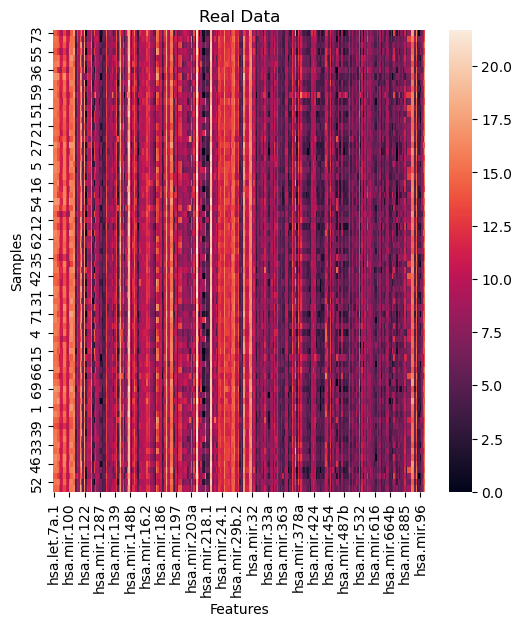

In [3]:
# If we only have the real samples...
visualize(real, groups_real, unique_types, ratio=1, seed=88)

# PRADSubtype classification accurary multiple classifier

In [4]:
# Create candidate sample sizes ranging from 'step' to the full size of real data
step = len(real) // 30
n_candidate = np.arange(step, len(real) + 1, step)
n_candidate = n_candidate[(n_candidate >= 12) & (n_candidate <= len(real))]

# Define target sizes that go beyond the candidate range (extrapolation)
n_target = np.array([n_candidate[-1] + x * step for x in range(1, 4)])
print(f'n_candidate: {n_candidate}\nn_target: {n_target}')

n_candidate: [12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58
 60 62 64 66 68 70 72 74]
n_target: [76 78 80]


In [20]:
# Evaluate the classifier for real data
metric_real = eval_classifier(whole_generated=real,
                              whole_groups=groups_real,
                              n_candidate=n_candidate,
                              n_draw=30, log=True)

# Save the results to csv file if necessary
metric_real.to_csv(f'LIHCSubtypeFamInd_DESeq_metric_real.csv', index=False)


Running sample size index 1/32 (n = 12)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=0, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.7000
[n=12, draw=0, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.6000
[n=12, draw=0, method=KNN] F1: 0.4000, Acc: 0.4333, AUC: 0.5000
[n=12, draw=0, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=0, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=1, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=1, method=SVM] F1: 0.3167, Acc: 0.3667, AUC: 0.4000
[n=12, draw=1, method=KNN] F1: 0.4667, Acc: 0.5333, AUC: 0.4500
[n=12, draw=1, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=1, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=2, method=LOGIS] F1: 0.4667, Acc: 0.4667, AUC: 0.6000
[n=12, draw=2, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.4000
[n=12, draw=2, method=KNN] F1: 0.4000, Acc: 0.4667, AUC: 0.5500
[n=12, draw=2, method=RF] F1: 0.2667, Acc: 0.2667, AUC: 0.4000
[n=12, draw=2, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=3, method=LOGIS] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=12, draw=3, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.5000
[n=12, draw=3, method=KNN] F1: 0.5167, Acc: 0.5667, AUC: 0.6000
[n=12, draw=3, method=RF] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=12, draw=3, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=4, method=LOGIS] F1: 0.6000, Acc: 0.6000, AUC: 0.6000
[n=12, draw=4, method=SVM] F1: 0.2333, Acc: 0.3333, AUC: 0.2000
[n=12, draw=4, method=KNN] F1: 0.5333, Acc: 0.5667, AUC: 0.7500
[n=12, draw=4, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.6000
[n=12, draw=4, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=5, method=LOGIS] F1: 0.7833, Acc: 0.8000, AUC: 0.8000
[n=12, draw=5, method=SVM] F1: 0.7000, Acc: 0.7333, AUC: 0.3000
[n=12, draw=5, method=KNN] F1: 0.5467, Acc: 0.6667, AUC: 0.6500
[n=12, draw=5, method=RF] F1: 0.8667, Acc: 0.8667, AUC: 0.9000
[n=12, draw=5, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=6, method=LOGIS] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=12, draw=6, method=SVM] F1: 0.4500, Acc: 0.4667, AUC: 0.6000
[n=12, draw=6, method=KNN] F1: 0.7167, Acc: 0.7667, AUC: 0.7000
[n=12, draw=6, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=6, method=XGB] F1: 0.3667, Acc: 0.4333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=7, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=7, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.4000
[n=12, draw=7, method=KNN] F1: 0.6000, Acc: 0.6333, AUC: 0.6500
[n=12, draw=7, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.8000
[n=12, draw=7, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=8, method=LOGIS] F1: 0.6667, Acc: 0.6667, AUC: 0.8000
[n=12, draw=8, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.3000
[n=12, draw=8, method=KNN] F1: 0.3167, Acc: 0.4000, AUC: 0.7000
[n=12, draw=8, method=RF] F1: 0.7333, Acc: 0.7333, AUC: 0.7000
[n=12, draw=8, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=9, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.7000
[n=12, draw=9, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.1000
[n=12, draw=9, method=KNN] F1: 0.5167, Acc: 0.5667, AUC: 0.6500
[n=12, draw=9, method=RF] F1: 0.4667, Acc: 0.5333, AUC: 0.7000
[n=12, draw=9, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=10, method=LOGIS] F1: 0.3000, Acc: 0.3333, AUC: 0.3000
[n=12, draw=10, method=SVM] F1: 0.3000, Acc: 0.3333, AUC: 0.7000
[n=12, draw=10, method=KNN] F1: 0.1667, Acc: 0.2333, AUC: 0.2000
[n=12, draw=10, method=RF] F1: 0.4000, Acc: 0.4333, AUC: 0.3000
[n=12, draw=10, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=11, method=LOGIS] F1: 0.9333, Acc: 0.9333, AUC: 0.9000
[n=12, draw=11, method=SVM] F1: 0.6500, Acc: 0.7000, AUC: 0.1000
[n=12, draw=11, method=KNN] F1: 0.5333, Acc: 0.6333, AUC: 0.5000
[n=12, draw=11, method=RF] F1: 0.6000, Acc: 0.6333, AUC: 0.7000
[n=12, draw=11, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=12, method=LOGIS] F1: 0.3000, Acc: 0.3333, AUC: 0.4000
[n=12, draw=12, method=SVM] F1: 0.4333, Acc: 0.5333, AUC: 0.7000
[n=12, draw=12, method=KNN] F1: 0.2500, Acc: 0.2667, AUC: 0.3000
[n=12, draw=12, method=RF] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=12, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=13, method=LOGIS] F1: 0.3000, Acc: 0.3333, AUC: 0.3000
[n=12, draw=13, method=SVM] F1: 0.3833, Acc: 0.4000, AUC: 0.7000
[n=12, draw=13, method=KNN] F1: 0.3167, Acc: 0.4000, AUC: 0.4000
[n=12, draw=13, method=RF] F1: 0.3833, Acc: 0.4000, AUC: 0.3000
[n=12, draw=13, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=14, method=LOGIS] F1: 0.6000, Acc: 0.6000, AUC: 0.6000
[n=12, draw=14, method=SVM] F1: 0.4500, Acc: 0.4667, AUC: 0.4000
[n=12, draw=14, method=KNN] F1: 0.6000, Acc: 0.6333, AUC: 0.6500
[n=12, draw=14, method=RF] F1: 0.6000, Acc: 0.6000, AUC: 0.6000
[n=12, draw=14, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=15, method=LOGIS] F1: 0.9333, Acc: 0.9333, AUC: 0.9000
[n=12, draw=15, method=SVM] F1: 0.7000, Acc: 0.7333, AUC: 0.1000
[n=12, draw=15, method=KNN] F1: 0.5667, Acc: 0.6333, AUC: 0.9000
[n=12, draw=15, method=RF] F1: 0.8667, Acc: 0.8667, AUC: 1.0000
[n=12, draw=15, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=16, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.7000
[n=12, draw=16, method=SVM] F1: 0.6500, Acc: 0.7000, AUC: 0.3000
[n=12, draw=16, method=KNN] F1: 0.7333, Acc: 0.7667, AUC: 0.8000
[n=12, draw=16, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.7000
[n=12, draw=16, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=17, method=LOGIS] F1: 0.3333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=17, method=SVM] F1: 0.1000, Acc: 0.1333, AUC: 0.5000
[n=12, draw=17, method=KNN] F1: 0.4000, Acc: 0.4333, AUC: 0.4500
[n=12, draw=17, method=RF] F1: 0.3333, Acc: 0.3667, AUC: 0.3000
[n=12, draw=17, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=18, method=LOGIS] F1: 0.6500, Acc: 0.6667, AUC: 0.7000
[n=12, draw=18, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.2000
[n=12, draw=18, method=KNN] F1: 0.4800, Acc: 0.5667, AUC: 0.6500
[n=12, draw=18, method=RF] F1: 0.6000, Acc: 0.6333, AUC: 0.7500
[n=12, draw=18, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=19, method=LOGIS] F1: 0.3000, Acc: 0.3333, AUC: 0.3000
[n=12, draw=19, method=SVM] F1: 0.3000, Acc: 0.3333, AUC: 0.5000
[n=12, draw=19, method=KNN] F1: 0.3667, Acc: 0.4333, AUC: 0.4000
[n=12, draw=19, method=RF] F1: 0.3000, Acc: 0.3333, AUC: 0.3000
[n=12, draw=19, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=20, method=LOGIS] F1: 0.3333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=20, method=SVM] F1: 0.1833, Acc: 0.2667, AUC: 0.6000
[n=12, draw=20, method=KNN] F1: 0.2000, Acc: 0.3000, AUC: 0.4000
[n=12, draw=20, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.5000
[n=12, draw=20, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=21, method=LOGIS] F1: 0.9333, Acc: 0.9333, AUC: 0.9000
[n=12, draw=21, method=SVM] F1: 0.7333, Acc: 0.7667, AUC: 0.5000
[n=12, draw=21, method=KNN] F1: 0.7833, Acc: 0.8000, AUC: 0.8500
[n=12, draw=21, method=RF] F1: 0.8667, Acc: 0.8667, AUC: 0.9000
[n=12, draw=21, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=22, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=22, method=SVM] F1: 0.7333, Acc: 0.7667, AUC: 0.4000
[n=12, draw=22, method=KNN] F1: 0.4800, Acc: 0.5667, AUC: 0.7000
[n=12, draw=22, method=RF] F1: 0.7333, Acc: 0.7333, AUC: 0.7000
[n=12, draw=22, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=23, method=LOGIS] F1: 0.7833, Acc: 0.8000, AUC: 0.8000
[n=12, draw=23, method=SVM] F1: 0.6500, Acc: 0.7000, AUC: 0.2000
[n=12, draw=23, method=KNN] F1: 0.7333, Acc: 0.7667, AUC: 0.9000
[n=12, draw=23, method=RF] F1: 0.8667, Acc: 0.8667, AUC: 0.8000
[n=12, draw=23, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=24, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=24, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.5000
[n=12, draw=24, method=KNN] F1: 0.3167, Acc: 0.4000, AUC: 0.4000
[n=12, draw=24, method=RF] F1: 0.2500, Acc: 0.3000, AUC: 0.1000
[n=12, draw=24, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=25, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.3000
[n=12, draw=25, method=SVM] F1: 0.5167, Acc: 0.6000, AUC: 0.4000
[n=12, draw=25, method=KNN] F1: 0.3833, Acc: 0.4000, AUC: 0.4000
[n=12, draw=25, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.4000
[n=12, draw=25, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=26, method=LOGIS] F1: 0.5000, Acc: 0.5333, AUC: 0.4000
[n=12, draw=26, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 1.0000
[n=12, draw=26, method=KNN] F1: 0.1167, Acc: 0.1667, AUC: 0.1000
[n=12, draw=26, method=RF] F1: 0.4500, Acc: 0.5000, AUC: 0.6000
[n=12, draw=26, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=27, method=LOGIS] F1: 0.2500, Acc: 0.2667, AUC: 0.2000
[n=12, draw=27, method=SVM] F1: 0.1167, Acc: 0.1667, AUC: 0.8000
[n=12, draw=27, method=KNN] F1: 0.3667, Acc: 0.4333, AUC: 0.4500
[n=12, draw=27, method=RF] F1: 0.2000, Acc: 0.2000, AUC: 0.2000
[n=12, draw=27, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=28, method=LOGIS] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=28, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.4000
[n=12, draw=28, method=KNN] F1: 0.4000, Acc: 0.4667, AUC: 0.4500
[n=12, draw=28, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.5000
[n=12, draw=28, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=29, method=LOGIS] F1: 1.0000, Acc: 1.0000, AUC: 1.0000
[n=12, draw=29, method=SVM] F1: 0.8667, Acc: 0.9000, AUC: 0.8000
[n=12, draw=29, method=KNN] F1: 0.7333, Acc: 0.8000, AUC: 1.0000
[n=12, draw=29, method=RF] F1: 1.0000, Acc: 1.0000, AUC: 1.0000
[n=12, draw=29, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000

Running sample size index 2/32 (n = 14)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=0, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.1000
[n=14, draw=0, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.9000
[n=14, draw=0, method=KNN] F1: 0.2600, Acc: 0.4000, AUC: 0.2000
[n=14, draw=0, method=RF] F1: 0.2300, Acc: 0.3333, AUC: 0.2000
[n=14, draw=0, method=XGB] F1: 0.3300, Acc: 0.4333, AUC: 0.5500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=1, method=LOGIS] F1: 0.4833, Acc: 0.5333, AUC: 0.3000
[n=14, draw=1, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.8000
[n=14, draw=1, method=KNN] F1: 0.1833, Acc: 0.2000, AUC: 0.2500
[n=14, draw=1, method=RF] F1: 0.2667, Acc: 0.3667, AUC: 0.3000
[n=14, draw=1, method=XGB] F1: 0.1500, Acc: 0.2000, AUC: 0.0500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=2, method=LOGIS] F1: 0.9333, Acc: 0.9333, AUC: 1.0000
[n=14, draw=2, method=SVM] F1: 0.7167, Acc: 0.7667, AUC: 0.4000
[n=14, draw=2, method=KNN] F1: 0.8000, Acc: 0.8000, AUC: 1.0000
[n=14, draw=2, method=RF] F1: 0.9333, Acc: 0.9333, AUC: 1.0000
[n=14, draw=2, method=XGB] F1: 0.6667, Acc: 0.6667, AUC: 0.7500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=3, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=14, draw=3, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.5000
[n=14, draw=3, method=KNN] F1: 0.2900, Acc: 0.4667, AUC: 0.5000
[n=14, draw=3, method=RF] F1: 0.2900, Acc: 0.4667, AUC: 0.4500
[n=14, draw=3, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.5000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=4, method=LOGIS] F1: 0.5167, Acc: 0.5333, AUC: 0.7000
[n=14, draw=4, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.3000
[n=14, draw=4, method=KNN] F1: 0.4667, Acc: 0.5000, AUC: 0.5500
[n=14, draw=4, method=RF] F1: 0.5433, Acc: 0.6667, AUC: 0.6000
[n=14, draw=4, method=XGB] F1: 0.7833, Acc: 0.8000, AUC: 0.7500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=5, method=LOGIS] F1: 0.4500, Acc: 0.4667, AUC: 0.6000
[n=14, draw=5, method=SVM] F1: 0.2600, Acc: 0.4000, AUC: 0.3000
[n=14, draw=5, method=KNN] F1: 0.2833, Acc: 0.3333, AUC: 0.5000
[n=14, draw=5, method=RF] F1: 0.2833, Acc: 0.3333, AUC: 0.5000
[n=14, draw=5, method=XGB] F1: 0.2833, Acc: 0.3333, AUC: 0.3000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=6, method=LOGIS] F1: 0.2333, Acc: 0.2667, AUC: 0.2000
[n=14, draw=6, method=SVM] F1: 0.2767, Acc: 0.4333, AUC: 0.8000
[n=14, draw=6, method=KNN] F1: 0.2967, Acc: 0.4333, AUC: 0.3500
[n=14, draw=6, method=RF] F1: 0.3500, Acc: 0.4333, AUC: 0.2000
[n=14, draw=6, method=XGB] F1: 0.4667, Acc: 0.5000, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=7, method=LOGIS] F1: 0.5667, Acc: 0.6000, AUC: 0.6000
[n=14, draw=7, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.1000
[n=14, draw=7, method=KNN] F1: 0.2967, Acc: 0.4333, AUC: 0.7000
[n=14, draw=7, method=RF] F1: 0.6500, Acc: 0.6667, AUC: 0.6000
[n=14, draw=7, method=XGB] F1: 0.3667, Acc: 0.4000, AUC: 0.5500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=8, method=LOGIS] F1: 0.5000, Acc: 0.5333, AUC: 0.5000
[n=14, draw=8, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.5000
[n=14, draw=8, method=KNN] F1: 0.4767, Acc: 0.6333, AUC: 0.4500
[n=14, draw=8, method=RF] F1: 0.3500, Acc: 0.4000, AUC: 0.6000
[n=14, draw=8, method=XGB] F1: 0.5300, Acc: 0.6333, AUC: 0.7000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=9, method=LOGIS] F1: 0.4333, Acc: 0.4667, AUC: 0.5000
[n=14, draw=9, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.5000
[n=14, draw=9, method=KNN] F1: 0.3833, Acc: 0.4000, AUC: 0.4000
[n=14, draw=9, method=RF] F1: 0.3500, Acc: 0.4333, AUC: 0.5000
[n=14, draw=9, method=XGB] F1: 0.4333, Acc: 0.4667, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=10, method=LOGIS] F1: 0.8667, Acc: 0.8667, AUC: 0.9000
[n=14, draw=10, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.2000
[n=14, draw=10, method=KNN] F1: 0.3267, Acc: 0.5000, AUC: 0.6000
[n=14, draw=10, method=RF] F1: 0.5967, Acc: 0.6667, AUC: 0.9000
[n=14, draw=10, method=XGB] F1: 0.9333, Acc: 0.9333, AUC: 1.0000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=11, method=LOGIS] F1: 0.5667, Acc: 0.6000, AUC: 0.6000
[n=14, draw=11, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.7000
[n=14, draw=11, method=KNN] F1: 0.6633, Acc: 0.7333, AUC: 0.7000
[n=14, draw=11, method=RF] F1: 0.4100, Acc: 0.5667, AUC: 0.6000
[n=14, draw=11, method=XGB] F1: 0.2000, Acc: 0.2667, AUC: 0.2500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=12, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.9000
[n=14, draw=12, method=SVM] F1: 0.4633, Acc: 0.5667, AUC: 0.1000
[n=14, draw=12, method=KNN] F1: 0.7333, Acc: 0.7333, AUC: 0.7500
[n=14, draw=12, method=RF] F1: 0.6800, Acc: 0.7333, AUC: 0.8000
[n=14, draw=12, method=XGB] F1: 0.4500, Acc: 0.4667, AUC: 0.4500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=13, method=LOGIS] F1: 0.7167, Acc: 0.7333, AUC: 0.8000
[n=14, draw=13, method=SVM] F1: 0.5000, Acc: 0.5667, AUC: 0.2000
[n=14, draw=13, method=KNN] F1: 0.7167, Acc: 0.7333, AUC: 0.8000
[n=14, draw=13, method=RF] F1: 0.7167, Acc: 0.7333, AUC: 0.7000
[n=14, draw=13, method=XGB] F1: 0.3500, Acc: 0.4333, AUC: 0.3500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=14, method=LOGIS] F1: 0.6667, Acc: 0.6667, AUC: 0.7000
[n=14, draw=14, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.5000
[n=14, draw=14, method=KNN] F1: 0.5600, Acc: 0.7000, AUC: 0.5000
[n=14, draw=14, method=RF] F1: 0.6333, Acc: 0.6667, AUC: 0.7000
[n=14, draw=14, method=XGB] F1: 0.6500, Acc: 0.7000, AUC: 0.8500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=15, method=LOGIS] F1: 0.3667, Acc: 0.4000, AUC: 0.2000
[n=14, draw=15, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.5000
[n=14, draw=15, method=KNN] F1: 0.1800, Acc: 0.2667, AUC: 0.2000
[n=14, draw=15, method=RF] F1: 0.2333, Acc: 0.2667, AUC: 0.3000
[n=14, draw=15, method=XGB] F1: 0.4667, Acc: 0.4667, AUC: 0.5000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=16, method=LOGIS] F1: 0.8667, Acc: 0.8667, AUC: 1.0000
[n=14, draw=16, method=SVM] F1: 0.8500, Acc: 0.8667, AUC: 0.8000
[n=14, draw=16, method=KNN] F1: 0.8133, Acc: 0.8667, AUC: 1.0000
[n=14, draw=16, method=RF] F1: 0.9333, Acc: 0.9333, AUC: 1.0000
[n=14, draw=16, method=XGB] F1: 0.6667, Acc: 0.6667, AUC: 0.7500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=17, method=LOGIS] F1: 0.6000, Acc: 0.6000, AUC: 0.7000
[n=14, draw=17, method=SVM] F1: 0.4767, Acc: 0.6333, AUC: 0.5000
[n=14, draw=17, method=KNN] F1: 0.5467, Acc: 0.6000, AUC: 0.6000
[n=14, draw=17, method=RF] F1: 0.6133, Acc: 0.6667, AUC: 0.6500
[n=14, draw=17, method=XGB] F1: 0.4500, Acc: 0.4667, AUC: 0.6500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=18, method=LOGIS] F1: 0.7167, Acc: 0.7333, AUC: 0.8000
[n=14, draw=18, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.3000
[n=14, draw=18, method=KNN] F1: 0.4833, Acc: 0.5333, AUC: 0.4500
[n=14, draw=18, method=RF] F1: 0.7167, Acc: 0.7333, AUC: 0.7000
[n=14, draw=18, method=XGB] F1: 0.5167, Acc: 0.5333, AUC: 0.5000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=19, method=LOGIS] F1: 0.1000, Acc: 0.1333, AUC: 0.0000
[n=14, draw=19, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 1.0000
[n=14, draw=19, method=KNN] F1: 0.2167, Acc: 0.3000, AUC: 0.2500
[n=14, draw=19, method=RF] F1: 0.3500, Acc: 0.4000, AUC: 0.2000
[n=14, draw=19, method=XGB] F1: 0.4000, Acc: 0.4000, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=20, method=LOGIS] F1: 0.6333, Acc: 0.6667, AUC: 0.7000
[n=14, draw=20, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.2000
[n=14, draw=20, method=KNN] F1: 0.2967, Acc: 0.4333, AUC: 0.5500
[n=14, draw=20, method=RF] F1: 0.3133, Acc: 0.4000, AUC: 0.3000
[n=14, draw=20, method=XGB] F1: 0.1500, Acc: 0.2000, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=21, method=LOGIS] F1: 0.7167, Acc: 0.7667, AUC: 0.9000
[n=14, draw=21, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.5000
[n=14, draw=21, method=KNN] F1: 0.5000, Acc: 0.5667, AUC: 0.6000
[n=14, draw=21, method=RF] F1: 0.4467, Acc: 0.5667, AUC: 0.3000
[n=14, draw=21, method=XGB] F1: 0.5833, Acc: 0.6333, AUC: 0.7500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=22, method=LOGIS] F1: 0.6500, Acc: 0.6667, AUC: 0.6000
[n=14, draw=22, method=SVM] F1: 0.2967, Acc: 0.4333, AUC: 0.4000
[n=14, draw=22, method=KNN] F1: 0.5667, Acc: 0.6000, AUC: 0.8000
[n=14, draw=22, method=RF] F1: 0.4333, Acc: 0.4667, AUC: 0.5000
[n=14, draw=22, method=XGB] F1: 0.4333, Acc: 0.4667, AUC: 0.4500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=23, method=LOGIS] F1: 0.2833, Acc: 0.3333, AUC: 0.4000
[n=14, draw=23, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.6000
[n=14, draw=23, method=KNN] F1: 0.5300, Acc: 0.6333, AUC: 0.5500
[n=14, draw=23, method=RF] F1: 0.3133, Acc: 0.4000, AUC: 0.4000
[n=14, draw=23, method=XGB] F1: 0.7833, Acc: 0.8000, AUC: 0.8500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=24, method=LOGIS] F1: 0.0000, Acc: 0.0000, AUC: 0.0000
[n=14, draw=24, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 1.0000
[n=14, draw=24, method=KNN] F1: 0.1500, Acc: 0.2000, AUC: 0.0000
[n=14, draw=24, method=RF] F1: 0.2467, Acc: 0.3667, AUC: 0.0000
[n=14, draw=24, method=XGB] F1: 0.1833, Acc: 0.2000, AUC: 0.1000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=25, method=LOGIS] F1: 0.8667, Acc: 0.8667, AUC: 0.8000
[n=14, draw=25, method=SVM] F1: 0.5667, Acc: 0.6333, AUC: 0.4000
[n=14, draw=25, method=KNN] F1: 0.7000, Acc: 0.7333, AUC: 0.8000
[n=14, draw=25, method=RF] F1: 0.8000, Acc: 0.8000, AUC: 0.9000
[n=14, draw=25, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.5000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=26, method=LOGIS] F1: 0.5667, Acc: 0.6000, AUC: 0.6000
[n=14, draw=26, method=SVM] F1: 0.2967, Acc: 0.4333, AUC: 0.4000
[n=14, draw=26, method=KNN] F1: 0.5967, Acc: 0.6667, AUC: 0.7500
[n=14, draw=26, method=RF] F1: 0.6333, Acc: 0.6667, AUC: 0.6000
[n=14, draw=26, method=XGB] F1: 0.2167, Acc: 0.3000, AUC: 0.0500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=27, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.1000
[n=14, draw=27, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.9000
[n=14, draw=27, method=KNN] F1: 0.3567, Acc: 0.5667, AUC: 0.1500
[n=14, draw=27, method=RF] F1: 0.3300, Acc: 0.4333, AUC: 0.4000
[n=14, draw=27, method=XGB] F1: 0.3500, Acc: 0.4000, AUC: 0.5500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=28, method=LOGIS] F1: 0.7167, Acc: 0.7333, AUC: 0.9000
[n=14, draw=28, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.2000
[n=14, draw=28, method=KNN] F1: 0.5167, Acc: 0.5667, AUC: 0.6500
[n=14, draw=28, method=RF] F1: 0.5500, Acc: 0.6000, AUC: 0.8000
[n=14, draw=28, method=XGB] F1: 0.7167, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=29, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.7000
[n=14, draw=29, method=SVM] F1: 0.4767, Acc: 0.6333, AUC: 0.1000
[n=14, draw=29, method=KNN] F1: 0.6000, Acc: 0.6000, AUC: 0.7000
[n=14, draw=29, method=RF] F1: 0.7833, Acc: 0.8000, AUC: 0.7000
[n=14, draw=29, method=XGB] F1: 0.6333, Acc: 0.6667, AUC: 0.7000

Running sample size index 3/32 (n = 16)

[n=16, draw=0, method=LOGIS] F1: 0.7833, Acc: 0.8000, AUC: 0.8000
[n=16, draw=0, method=SVM] F1: 0.4467, Acc: 0.5667, AUC: 0.4000
[n=16, draw=0, method=KNN] F1: 0.5333, Acc: 0.5667, AUC: 0.6250
[n=16, draw=0, method=RF] F1: 0.8000, Acc: 0.8000, AUC: 0.8500
[n=16, draw=0, method=XGB] F1: 0.7667, Acc: 0.7667, AUC: 0.8000
[n=16, draw=1, method=LOGIS] F1: 0.3500, Acc: 0.4000, AUC: 0.5000
[n=16, draw=1, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.6000
[n=16, draw=1, method=KNN] F1: 0.4233, Acc: 0.4500, AUC: 0.4250
[n=16, draw=1, method=RF] F1: 0.4633, Acc: 0.5333, AUC: 0.4000
[n=16, draw=1, method=XGB] F1: 0.5400, Acc: 0.5833, AU

In [21]:
# Evaluate the classifier for generated data
metric_generated = eval_classifier(whole_generated=generated,
                                   whole_groups=groups_generated,
                                   n_candidate=n_candidate,
                                   n_draw=30, log=True)

# Save the results to csv file if necessary
metric_generated.to_csv(f'LIHCSubtypeFamInd_DESeq_metric_generated.csv', index=False)


Running sample size index 1/32 (n = 12)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=0, method=LOGIS] F1: 0.7833, Acc: 0.8000, AUC: 0.8000
[n=12, draw=0, method=SVM] F1: 0.5833, Acc: 0.6000, AUC: 0.5000
[n=12, draw=0, method=KNN] F1: 0.4500, Acc: 0.5000, AUC: 0.5500
[n=12, draw=0, method=RF] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=12, draw=0, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=1, method=LOGIS] F1: 0.5000, Acc: 0.5333, AUC: 0.6000
[n=12, draw=1, method=SVM] F1: 0.6667, Acc: 0.6667, AUC: 0.4000
[n=12, draw=1, method=KNN] F1: 0.3167, Acc: 0.4000, AUC: 0.4500
[n=12, draw=1, method=RF] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=1, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=2, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=12, draw=2, method=SVM] F1: 0.2333, Acc: 0.3333, AUC: 0.4000
[n=12, draw=2, method=KNN] F1: 0.3167, Acc: 0.4000, AUC: 0.5500
[n=12, draw=2, method=RF] F1: 0.1833, Acc: 0.2000, AUC: 0.1000
[n=12, draw=2, method=XGB] F1: 0.3667, Acc: 0.4333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=3, method=LOGIS] F1: 0.3333, Acc: 0.3333, AUC: 0.4000
[n=12, draw=3, method=SVM] F1: 0.3833, Acc: 0.4000, AUC: 0.2000
[n=12, draw=3, method=KNN] F1: 0.3833, Acc: 0.4000, AUC: 0.4500
[n=12, draw=3, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=3, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=4, method=LOGIS] F1: 0.1000, Acc: 0.1333, AUC: 0.2000
[n=12, draw=4, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.3000
[n=12, draw=4, method=KNN] F1: 0.2667, Acc: 0.2667, AUC: 0.3000
[n=12, draw=4, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.4000
[n=12, draw=4, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=5, method=LOGIS] F1: 0.4667, Acc: 0.4667, AUC: 0.4000
[n=12, draw=5, method=SVM] F1: 0.3000, Acc: 0.4333, AUC: 0.2000
[n=12, draw=5, method=KNN] F1: 0.3833, Acc: 0.5000, AUC: 0.6500
[n=12, draw=5, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.6000
[n=12, draw=5, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=6, method=LOGIS] F1: 0.1333, Acc: 0.1333, AUC: 0.2000
[n=12, draw=6, method=SVM] F1: 0.5333, Acc: 0.5333, AUC: 0.2000
[n=12, draw=6, method=KNN] F1: 0.5167, Acc: 0.5667, AUC: 0.6000
[n=12, draw=6, method=RF] F1: 0.2500, Acc: 0.2667, AUC: 0.3000
[n=12, draw=6, method=XGB] F1: 0.1667, Acc: 0.2333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=7, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=7, method=SVM] F1: 0.7333, Acc: 0.7667, AUC: 0.1000
[n=12, draw=7, method=KNN] F1: 0.4667, Acc: 0.5333, AUC: 0.5500
[n=12, draw=7, method=RF] F1: 0.8500, Acc: 0.8667, AUC: 0.9000
[n=12, draw=7, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=8, method=LOGIS] F1: 0.6000, Acc: 0.6000, AUC: 0.6000
[n=12, draw=8, method=SVM] F1: 0.5333, Acc: 0.5333, AUC: 0.4000
[n=12, draw=8, method=KNN] F1: 0.4667, Acc: 0.5000, AUC: 0.6000
[n=12, draw=8, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=8, method=XGB] F1: 0.1667, Acc: 0.2333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=9, method=LOGIS] F1: 0.3333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=9, method=SVM] F1: 0.1000, Acc: 0.1333, AUC: 0.3000
[n=12, draw=9, method=KNN] F1: 0.3167, Acc: 0.3667, AUC: 0.4000
[n=12, draw=9, method=RF] F1: 0.3333, Acc: 0.3333, AUC: 0.4000
[n=12, draw=9, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=10, method=LOGIS] F1: 0.8667, Acc: 0.8667, AUC: 0.9000
[n=12, draw=10, method=SVM] F1: 0.6000, Acc: 0.6667, AUC: 0.2000
[n=12, draw=10, method=KNN] F1: 0.4500, Acc: 0.5000, AUC: 0.6500
[n=12, draw=10, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.7000
[n=12, draw=10, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=11, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=12, draw=11, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.5000
[n=12, draw=11, method=KNN] F1: 0.2500, Acc: 0.2667, AUC: 0.2500
[n=12, draw=11, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.5000
[n=12, draw=11, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=12, method=LOGIS] F1: 0.4500, Acc: 0.4667, AUC: 0.4000
[n=12, draw=12, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.6000
[n=12, draw=12, method=KNN] F1: 0.1167, Acc: 0.1667, AUC: 0.1500
[n=12, draw=12, method=RF] F1: 0.4500, Acc: 0.4667, AUC: 0.4000
[n=12, draw=12, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=13, method=LOGIS] F1: 0.2000, Acc: 0.2000, AUC: 0.2000
[n=12, draw=13, method=SVM] F1: 0.3167, Acc: 0.3667, AUC: 0.8000
[n=12, draw=13, method=KNN] F1: 0.2500, Acc: 0.2667, AUC: 0.2500
[n=12, draw=13, method=RF] F1: 0.2000, Acc: 0.2000, AUC: 0.2000
[n=12, draw=13, method=XGB] F1: 0.3667, Acc: 0.4333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=14, method=LOGIS] F1: 0.6667, Acc: 0.6667, AUC: 0.8000
[n=12, draw=14, method=SVM] F1: 0.5833, Acc: 0.6000, AUC: 0.1000
[n=12, draw=14, method=KNN] F1: 0.4500, Acc: 0.5000, AUC: 0.6000
[n=12, draw=14, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.6000
[n=12, draw=14, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=15, method=LOGIS] F1: 0.4667, Acc: 0.4667, AUC: 0.6000
[n=12, draw=15, method=SVM] F1: 0.6667, Acc: 0.7000, AUC: 0.0000
[n=12, draw=15, method=KNN] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=12, draw=15, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.6000
[n=12, draw=15, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=16, method=LOGIS] F1: 0.4667, Acc: 0.4667, AUC: 0.5000
[n=12, draw=16, method=SVM] F1: 0.6000, Acc: 0.6333, AUC: 0.5000
[n=12, draw=16, method=KNN] F1: 0.6667, Acc: 0.6667, AUC: 0.6500
[n=12, draw=16, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.8000
[n=12, draw=16, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=17, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.1000
[n=12, draw=17, method=SVM] F1: 0.1000, Acc: 0.1333, AUC: 0.9000
[n=12, draw=17, method=KNN] F1: 0.1000, Acc: 0.1333, AUC: 0.2000
[n=12, draw=17, method=RF] F1: 0.1833, Acc: 0.2000, AUC: 0.2000
[n=12, draw=17, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=18, method=LOGIS] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=18, method=SVM] F1: 0.3000, Acc: 0.3333, AUC: 0.5000
[n=12, draw=18, method=KNN] F1: 0.2500, Acc: 0.3000, AUC: 0.4500
[n=12, draw=18, method=RF] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=12, draw=18, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=19, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=19, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.6000
[n=12, draw=19, method=KNN] F1: 0.3667, Acc: 0.4333, AUC: 0.4000
[n=12, draw=19, method=RF] F1: 0.4500, Acc: 0.4667, AUC: 0.4000
[n=12, draw=19, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=20, method=LOGIS] F1: 0.4667, Acc: 0.4667, AUC: 0.4000
[n=12, draw=20, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.7000
[n=12, draw=20, method=KNN] F1: 0.4667, Acc: 0.4667, AUC: 0.5000
[n=12, draw=20, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.5000
[n=12, draw=20, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=21, method=LOGIS] F1: 0.1333, Acc: 0.1333, AUC: 0.1000
[n=12, draw=21, method=SVM] F1: 0.2333, Acc: 0.3333, AUC: 0.7000
[n=12, draw=21, method=KNN] F1: 0.1967, Acc: 0.3000, AUC: 0.3000
[n=12, draw=21, method=RF] F1: 0.1333, Acc: 0.1333, AUC: 0.1000
[n=12, draw=21, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=22, method=LOGIS] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=12, draw=22, method=SVM] F1: 0.1167, Acc: 0.1667, AUC: 0.8000
[n=12, draw=22, method=KNN] F1: 0.1833, Acc: 0.2000, AUC: 0.1500
[n=12, draw=22, method=RF] F1: 0.2667, Acc: 0.3000, AUC: 0.2000
[n=12, draw=22, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=23, method=LOGIS] F1: 0.8000, Acc: 0.8000, AUC: 0.8000
[n=12, draw=23, method=SVM] F1: 0.7333, Acc: 0.7333, AUC: 0.4000
[n=12, draw=23, method=KNN] F1: 0.8000, Acc: 0.8000, AUC: 0.8000
[n=12, draw=23, method=RF] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=23, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=24, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.3000
[n=12, draw=24, method=SVM] F1: 0.5667, Acc: 0.6333, AUC: 0.1000
[n=12, draw=24, method=KNN] F1: 0.6000, Acc: 0.6667, AUC: 0.7500
[n=12, draw=24, method=RF] F1: 0.7833, Acc: 0.8000, AUC: 0.9000
[n=12, draw=24, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=25, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=12, draw=25, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.5000
[n=12, draw=25, method=KNN] F1: 0.4500, Acc: 0.5000, AUC: 0.5000
[n=12, draw=25, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.6000
[n=12, draw=25, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=26, method=LOGIS] F1: 0.0000, Acc: 0.0000, AUC: 0.0000
[n=12, draw=26, method=SVM] F1: 0.3000, Acc: 0.3333, AUC: 0.8000
[n=12, draw=26, method=KNN] F1: 0.1167, Acc: 0.1667, AUC: 0.2000
[n=12, draw=26, method=RF] F1: 0.2667, Acc: 0.3000, AUC: 0.2000
[n=12, draw=26, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=27, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.7000
[n=12, draw=27, method=SVM] F1: 0.5333, Acc: 0.5667, AUC: 0.3000
[n=12, draw=27, method=KNN] F1: 0.6000, Acc: 0.6667, AUC: 0.6000
[n=12, draw=27, method=RF] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=12, draw=27, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=28, method=LOGIS] F1: 0.1333, Acc: 0.1333, AUC: 0.2000
[n=12, draw=28, method=SVM] F1: 0.0500, Acc: 0.0667, AUC: 0.8000
[n=12, draw=28, method=KNN] F1: 0.4500, Acc: 0.5000, AUC: 0.4500
[n=12, draw=28, method=RF] F1: 0.1333, Acc: 0.1333, AUC: 0.1500
[n=12, draw=28, method=XGB] F1: 0.3667, Acc: 0.4333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=29, method=LOGIS] F1: 0.5000, Acc: 0.5333, AUC: 0.5000
[n=12, draw=29, method=SVM] F1: 0.5833, Acc: 0.6000, AUC: 0.4000
[n=12, draw=29, method=KNN] F1: 0.5333, Acc: 0.5667, AUC: 0.5500
[n=12, draw=29, method=RF] F1: 0.5000, Acc: 0.5333, AUC: 0.5000
[n=12, draw=29, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000

Running sample size index 2/32 (n = 14)

[n=14, draw=0, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.2000
[n=14, draw=0, method=SVM] F1: 0.4333, Acc: 0.5000, AUC: 0.4000
[n=14, draw=0, method=KNN] F1: 0.4667, Acc: 0.5000, AUC: 0.5500
[n=14, draw=0, method=RF] F1: 0.5167, Acc: 0.5333, AUC: 0.6000
[n=14, draw=0, method=XGB] F1: 0.5167, Acc: 0.5333, AUC: 0.6000
[n=14, draw=1, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=14, draw=1, method=SVM] F1: 0.1500, Acc: 0.2000, AUC: 0.7000
[n=14, draw=1, method=KNN] F1: 0.2333, Acc: 0.2667, AUC: 0.2500
[n=14, draw=1, method=RF] F1: 0.1000, Acc: 0.1333, AUC: 0.0000
[n=14, draw=1, method=XGB] F1: 0.1500, Acc: 0.2000, AU

In [25]:
# If we have already saved the results
# metric_real = pd.read_csv(f'PRADSubtype_icd_o_3_histology_metric_real.csv',header = 0)
# metric_generated = pd.read_csv(f'PRADSubtype_icd_o_3_histology_metric_generated.csv',header = 0)

LOGIS
SVM
KNN
RF
XGB


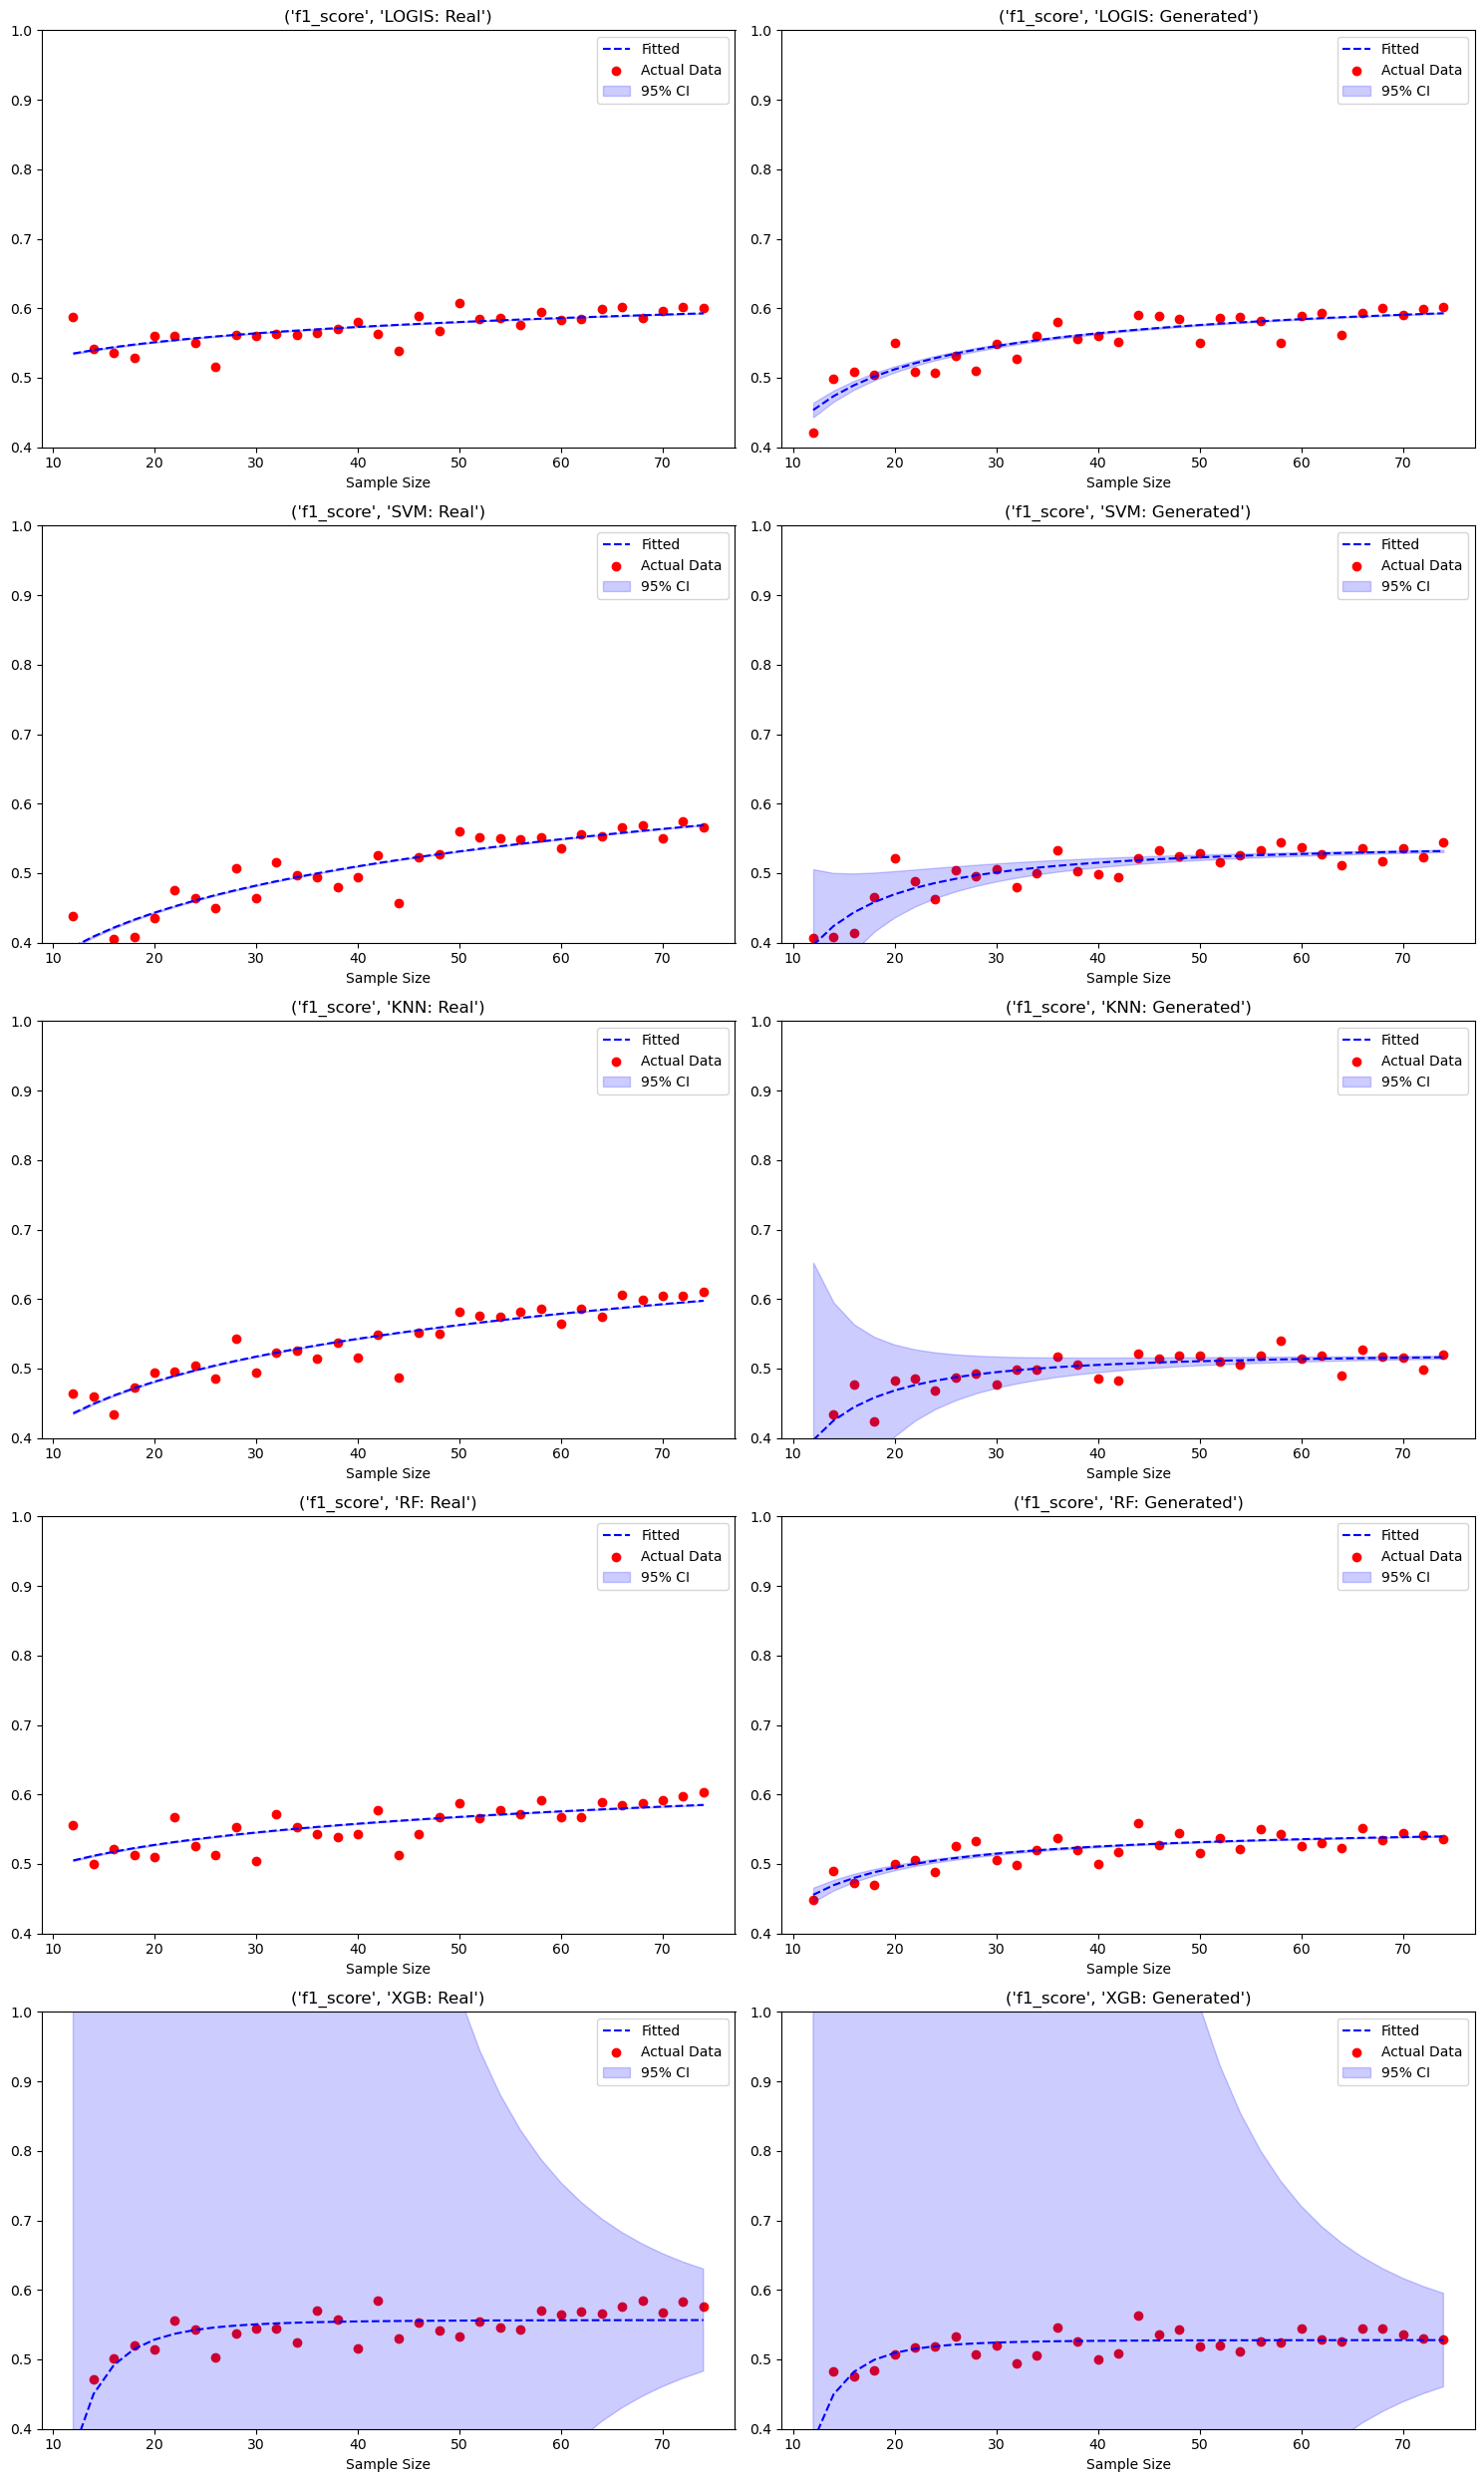

In [24]:
# Visualize the classifier performance
import matplotlib.pyplot as plt
p_acc = vis_classifier(metric_generated=metric_generated,
                       metric_real=metric_real,
                       metric_name='f1_score',
                       n_target=n_target, save = False)

In [26]:
real_file_name = r"./Case/LIHCSubtypeFamInd_test74.csv"
generated_file_name = r"./Case/LIHCSubtypeFamInd_train294_epochES_batch01_CVAE1-10_generated.csv"
real, groups_real, generated, groups_generated, unique_types = get_data_metrics(real_file_name, generated_file_name)

In [27]:
step = len(real) // 30
n_candidate = np.arange(step, len(real) + 1, step)
n_candidate = n_candidate[(n_candidate >= 12) & (n_candidate <= len(real))]

# Define target sizes that go beyond the candidate range (extrapolation)
n_target = np.array([n_candidate[-1] + x * step for x in range(1, 4)])
print(f'n_candidate: {n_candidate}\nn_target: {n_target}')

n_candidate: [12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58
 60 62 64 66 68 70 72 74]
n_target: [76 78 80]


In [28]:
metric_real = eval_classifier(whole_generated=real,
                              whole_groups=groups_real,
                              n_candidate=n_candidate,
                              n_draw=30, log=True)

# Save the results to csv file if necessary
metric_real.to_csv(f'LIHCSubtypeFamInd_metric_real.csv', index=False)


Running sample size index 1/32 (n = 12)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=0, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.7000
[n=12, draw=0, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.1000
[n=12, draw=0, method=KNN] F1: 0.5000, Acc: 0.5333, AUC: 0.5500
[n=12, draw=0, method=RF] F1: 0.6000, Acc: 0.6333, AUC: 0.5000
[n=12, draw=0, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=1, method=LOGIS] F1: 0.1333, Acc: 0.1333, AUC: 0.1000
[n=12, draw=1, method=SVM] F1: 0.1833, Acc: 0.2667, AUC: 0.4000
[n=12, draw=1, method=KNN] F1: 0.1167, Acc: 0.1667, AUC: 0.1500
[n=12, draw=1, method=RF] F1: 0.3333, Acc: 0.3333, AUC: 0.4000
[n=12, draw=1, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=2, method=LOGIS] F1: 0.2500, Acc: 0.2667, AUC: 0.3000
[n=12, draw=2, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.7000
[n=12, draw=2, method=KNN] F1: 0.3833, Acc: 0.5000, AUC: 0.4500
[n=12, draw=2, method=RF] F1: 0.2500, Acc: 0.3000, AUC: 0.5000
[n=12, draw=2, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=3, method=LOGIS] F1: 0.5000, Acc: 0.5333, AUC: 0.6000
[n=12, draw=3, method=SVM] F1: 0.2333, Acc: 0.3333, AUC: 0.6000
[n=12, draw=3, method=KNN] F1: 0.4000, Acc: 0.4667, AUC: 0.4500
[n=12, draw=3, method=RF] F1: 0.6500, Acc: 0.6667, AUC: 0.7000
[n=12, draw=3, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=4, method=LOGIS] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=4, method=SVM] F1: 0.3000, Acc: 0.3333, AUC: 0.2000
[n=12, draw=4, method=KNN] F1: 0.3333, Acc: 0.3667, AUC: 0.4000
[n=12, draw=4, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.5000
[n=12, draw=4, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=5, method=LOGIS] F1: 0.7833, Acc: 0.8000, AUC: 0.9000
[n=12, draw=5, method=SVM] F1: 0.7833, Acc: 0.8000, AUC: 0.3000
[n=12, draw=5, method=KNN] F1: 0.3333, Acc: 0.4333, AUC: 0.6000
[n=12, draw=5, method=RF] F1: 0.8667, Acc: 0.8667, AUC: 0.9000
[n=12, draw=5, method=XGB] F1: 0.2333, Acc: 0.3333, AUC: 0.5000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=6, method=LOGIS] F1: 0.4667, Acc: 0.4667, AUC: 0.5000
[n=12, draw=6, method=SVM] F1: 0.4667, Acc: 0.4667, AUC: 0.4000
[n=12, draw=6, method=KNN] F1: 0.5333, Acc: 0.5667, AUC: 0.5500
[n=12, draw=6, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.4000
[n=12, draw=6, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=7, method=LOGIS] F1: 0.8000, Acc: 0.8000, AUC: 0.8000
[n=12, draw=7, method=SVM] F1: 0.6500, Acc: 0.7000, AUC: 0.0000
[n=12, draw=7, method=KNN] F1: 0.5833, Acc: 0.6667, AUC: 0.8000
[n=12, draw=7, method=RF] F1: 0.8667, Acc: 0.8667, AUC: 0.9000
[n=12, draw=7, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=8, method=LOGIS] F1: 0.7833, Acc: 0.8000, AUC: 0.7000
[n=12, draw=8, method=SVM] F1: 0.6500, Acc: 0.7000, AUC: 0.5000
[n=12, draw=8, method=KNN] F1: 0.3833, Acc: 0.4667, AUC: 0.4500
[n=12, draw=8, method=RF] F1: 0.7833, Acc: 0.8000, AUC: 0.8000
[n=12, draw=8, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=9, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=9, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.2000
[n=12, draw=9, method=KNN] F1: 0.4667, Acc: 0.5333, AUC: 0.8000
[n=12, draw=9, method=RF] F1: 0.8000, Acc: 0.8000, AUC: 0.8000
[n=12, draw=9, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=10, method=LOGIS] F1: 1.0000, Acc: 1.0000, AUC: 1.0000
[n=12, draw=10, method=SVM] F1: 0.9333, Acc: 0.9333, AUC: 0.8000
[n=12, draw=10, method=KNN] F1: 0.9333, Acc: 0.9333, AUC: 0.9500
[n=12, draw=10, method=RF] F1: 1.0000, Acc: 1.0000, AUC: 1.0000
[n=12, draw=10, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=11, method=LOGIS] F1: 0.1333, Acc: 0.1333, AUC: 0.1000
[n=12, draw=11, method=SVM] F1: 0.2333, Acc: 0.3333, AUC: 0.8000
[n=12, draw=11, method=KNN] F1: 0.5167, Acc: 0.6000, AUC: 0.5000
[n=12, draw=11, method=RF] F1: 0.3833, Acc: 0.4000, AUC: 0.4000
[n=12, draw=11, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=12, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=12, method=SVM] F1: 0.6667, Acc: 0.6667, AUC: 0.2000
[n=12, draw=12, method=KNN] F1: 0.6667, Acc: 0.6667, AUC: 0.7500
[n=12, draw=12, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.8000
[n=12, draw=12, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=13, method=LOGIS] F1: 0.2667, Acc: 0.2667, AUC: 0.3000
[n=12, draw=13, method=SVM] F1: 0.1000, Acc: 0.1333, AUC: 0.7000
[n=12, draw=13, method=KNN] F1: 0.3167, Acc: 0.4000, AUC: 0.4500
[n=12, draw=13, method=RF] F1: 0.2667, Acc: 0.2667, AUC: 0.3000
[n=12, draw=13, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=14, method=LOGIS] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=12, draw=14, method=SVM] F1: 0.2333, Acc: 0.3333, AUC: 0.7000
[n=12, draw=14, method=KNN] F1: 0.4000, Acc: 0.4333, AUC: 0.4500
[n=12, draw=14, method=RF] F1: 0.1833, Acc: 0.2000, AUC: 0.2000
[n=12, draw=14, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=15, method=LOGIS] F1: 0.3333, Acc: 0.3333, AUC: 0.4000
[n=12, draw=15, method=SVM] F1: 0.1833, Acc: 0.2000, AUC: 0.6000
[n=12, draw=15, method=KNN] F1: 0.4667, Acc: 0.5333, AUC: 0.4500
[n=12, draw=15, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.6000
[n=12, draw=15, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=16, method=LOGIS] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=16, method=SVM] F1: 0.4333, Acc: 0.5333, AUC: 0.5000
[n=12, draw=16, method=KNN] F1: 0.5333, Acc: 0.5333, AUC: 0.5500
[n=12, draw=16, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.5000
[n=12, draw=16, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=17, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.2000
[n=12, draw=17, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.8000
[n=12, draw=17, method=KNN] F1: 0.2500, Acc: 0.3000, AUC: 0.3000
[n=12, draw=17, method=RF] F1: 0.2667, Acc: 0.2667, AUC: 0.2000
[n=12, draw=17, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=18, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=18, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.0000
[n=12, draw=18, method=KNN] F1: 0.5167, Acc: 0.6000, AUC: 0.7000
[n=12, draw=18, method=RF] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=18, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=19, method=LOGIS] F1: 0.3000, Acc: 0.3333, AUC: 0.3000
[n=12, draw=19, method=SVM] F1: 0.2500, Acc: 0.2667, AUC: 0.7000
[n=12, draw=19, method=KNN] F1: 0.4500, Acc: 0.4667, AUC: 0.4000
[n=12, draw=19, method=RF] F1: 0.2500, Acc: 0.2667, AUC: 0.3000
[n=12, draw=19, method=XGB] F1: 0.1667, Acc: 0.2333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=20, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.3000
[n=12, draw=20, method=SVM] F1: 0.1000, Acc: 0.1333, AUC: 1.0000
[n=12, draw=20, method=KNN] F1: 0.3000, Acc: 0.4333, AUC: 0.3500
[n=12, draw=20, method=RF] F1: 0.1333, Acc: 0.1333, AUC: 0.1000
[n=12, draw=20, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=21, method=LOGIS] F1: 0.0500, Acc: 0.0667, AUC: 0.0000
[n=12, draw=21, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 1.0000
[n=12, draw=21, method=KNN] F1: 0.0667, Acc: 0.1000, AUC: 0.1000
[n=12, draw=21, method=RF] F1: 0.3333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=21, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=22, method=LOGIS] F1: 0.6667, Acc: 0.6667, AUC: 0.7000
[n=12, draw=22, method=SVM] F1: 0.5000, Acc: 0.5333, AUC: 0.5000
[n=12, draw=22, method=KNN] F1: 0.5833, Acc: 0.6000, AUC: 0.5500
[n=12, draw=22, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.6000
[n=12, draw=22, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=23, method=LOGIS] F1: 0.4500, Acc: 0.4667, AUC: 0.4000
[n=12, draw=23, method=SVM] F1: 0.1833, Acc: 0.2667, AUC: 0.9000
[n=12, draw=23, method=KNN] F1: 0.3167, Acc: 0.3667, AUC: 0.4000
[n=12, draw=23, method=RF] F1: 0.3167, Acc: 0.3667, AUC: 0.4000
[n=12, draw=23, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=24, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=24, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.2000
[n=12, draw=24, method=KNN] F1: 0.3000, Acc: 0.4333, AUC: 0.4000
[n=12, draw=24, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.7000
[n=12, draw=24, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=25, method=LOGIS] F1: 0.3333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=25, method=SVM] F1: 0.1000, Acc: 0.1333, AUC: 0.9000
[n=12, draw=25, method=KNN] F1: 0.3333, Acc: 0.3667, AUC: 0.3000
[n=12, draw=25, method=RF] F1: 0.1833, Acc: 0.2000, AUC: 0.2000
[n=12, draw=25, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=26, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=26, method=SVM] F1: 0.2333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=26, method=KNN] F1: 0.3167, Acc: 0.3667, AUC: 0.5000
[n=12, draw=26, method=RF] F1: 0.5833, Acc: 0.6000, AUC: 0.5000
[n=12, draw=26, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=27, method=LOGIS] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=27, method=SVM] F1: 0.2500, Acc: 0.3000, AUC: 0.7000
[n=12, draw=27, method=KNN] F1: 0.4667, Acc: 0.4667, AUC: 0.5000
[n=12, draw=27, method=RF] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=27, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=28, method=LOGIS] F1: 0.5000, Acc: 0.5333, AUC: 0.5000
[n=12, draw=28, method=SVM] F1: 0.4333, Acc: 0.5333, AUC: 0.7000
[n=12, draw=28, method=KNN] F1: 0.6667, Acc: 0.6667, AUC: 0.6000
[n=12, draw=28, method=RF] F1: 0.3000, Acc: 0.3333, AUC: 0.3500
[n=12, draw=28, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=29, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.1000
[n=12, draw=29, method=SVM] F1: 0.3000, Acc: 0.4333, AUC: 0.8000
[n=12, draw=29, method=KNN] F1: 0.3833, Acc: 0.4667, AUC: 0.3500
[n=12, draw=29, method=RF] F1: 0.2000, Acc: 0.2333, AUC: 0.1000
[n=12, draw=29, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000

Running sample size index 2/32 (n = 14)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=0, method=LOGIS] F1: 0.6000, Acc: 0.6000, AUC: 0.7000
[n=14, draw=0, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.7000
[n=14, draw=0, method=KNN] F1: 0.3167, Acc: 0.3333, AUC: 0.4500
[n=14, draw=0, method=RF] F1: 0.3500, Acc: 0.4333, AUC: 0.5000
[n=14, draw=0, method=XGB] F1: 0.4333, Acc: 0.4667, AUC: 0.4500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=1, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.7000
[n=14, draw=1, method=SVM] F1: 0.4767, Acc: 0.6333, AUC: 0.2000
[n=14, draw=1, method=KNN] F1: 0.4633, Acc: 0.5333, AUC: 0.6500
[n=14, draw=1, method=RF] F1: 0.8500, Acc: 0.8667, AUC: 1.0000
[n=14, draw=1, method=XGB] F1: 0.6333, Acc: 0.6667, AUC: 0.8500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=2, method=LOGIS] F1: 0.1000, Acc: 0.1333, AUC: 0.1000
[n=14, draw=2, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.9000
[n=14, draw=2, method=KNN] F1: 0.1500, Acc: 0.2000, AUC: 0.2000
[n=14, draw=2, method=RF] F1: 0.3000, Acc: 0.3667, AUC: 0.1000
[n=14, draw=2, method=XGB] F1: 0.3333, Acc: 0.3333, AUC: 0.3000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=3, method=LOGIS] F1: 0.5167, Acc: 0.5333, AUC: 0.4000
[n=14, draw=3, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.4000
[n=14, draw=3, method=KNN] F1: 0.7833, Acc: 0.8000, AUC: 0.7500
[n=14, draw=3, method=RF] F1: 0.5667, Acc: 0.6000, AUC: 0.5000
[n=14, draw=3, method=XGB] F1: 0.2633, Acc: 0.3333, AUC: 0.2500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=4, method=LOGIS] F1: 0.2833, Acc: 0.3333, AUC: 0.4000
[n=14, draw=4, method=SVM] F1: 0.3800, Acc: 0.5000, AUC: 0.3000
[n=14, draw=4, method=KNN] F1: 0.2667, Acc: 0.3667, AUC: 0.3000
[n=14, draw=4, method=RF] F1: 0.2833, Acc: 0.3333, AUC: 0.4000
[n=14, draw=4, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.3500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=5, method=LOGIS] F1: 0.4333, Acc: 0.4667, AUC: 0.5000
[n=14, draw=5, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.9000
[n=14, draw=5, method=KNN] F1: 0.2300, Acc: 0.3333, AUC: 0.2500
[n=14, draw=5, method=RF] F1: 0.2167, Acc: 0.3000, AUC: 0.2000
[n=14, draw=5, method=XGB] F1: 0.3500, Acc: 0.4333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=6, method=LOGIS] F1: 0.8000, Acc: 0.8000, AUC: 1.0000
[n=14, draw=6, method=SVM] F1: 0.5967, Acc: 0.7000, AUC: 0.0000
[n=14, draw=6, method=KNN] F1: 0.8000, Acc: 0.8000, AUC: 0.9500
[n=14, draw=6, method=RF] F1: 0.7833, Acc: 0.8000, AUC: 0.9000
[n=14, draw=6, method=XGB] F1: 0.8667, Acc: 0.8667, AUC: 0.9500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=7, method=LOGIS] F1: 0.4500, Acc: 0.5000, AUC: 0.5000
[n=14, draw=7, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.2000
[n=14, draw=7, method=KNN] F1: 0.4167, Acc: 0.5000, AUC: 0.6500
[n=14, draw=7, method=RF] F1: 0.4000, Acc: 0.4667, AUC: 0.5000
[n=14, draw=7, method=XGB] F1: 0.5800, Acc: 0.6667, AUC: 0.8500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=8, method=LOGIS] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=14, draw=8, method=SVM] F1: 0.3800, Acc: 0.5000, AUC: 0.6000
[n=14, draw=8, method=KNN] F1: 0.6000, Acc: 0.6000, AUC: 0.5500
[n=14, draw=8, method=RF] F1: 0.5167, Acc: 0.5667, AUC: 0.5000
[n=14, draw=8, method=XGB] F1: 0.6667, Acc: 0.7000, AUC: 0.7500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=9, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=14, draw=9, method=SVM] F1: 0.5967, Acc: 0.7000, AUC: 0.2000
[n=14, draw=9, method=KNN] F1: 0.3967, Acc: 0.4667, AUC: 0.4500
[n=14, draw=9, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.6000
[n=14, draw=9, method=XGB] F1: 0.4333, Acc: 0.4667, AUC: 0.5000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=10, method=LOGIS] F1: 0.6000, Acc: 0.6000, AUC: 0.6000
[n=14, draw=10, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.5000
[n=14, draw=10, method=KNN] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=14, draw=10, method=RF] F1: 0.3500, Acc: 0.4000, AUC: 0.5500
[n=14, draw=10, method=XGB] F1: 0.3167, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=11, method=LOGIS] F1: 0.0000, Acc: 0.0000, AUC: 0.0000
[n=14, draw=11, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 1.0000
[n=14, draw=11, method=KNN] F1: 0.2967, Acc: 0.4333, AUC: 0.5500
[n=14, draw=11, method=RF] F1: 0.1667, Acc: 0.2333, AUC: 0.3500
[n=14, draw=11, method=XGB] F1: 0.5133, Acc: 0.6000, AUC: 0.7000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=12, method=LOGIS] F1: 0.4333, Acc: 0.4667, AUC: 0.4000
[n=14, draw=12, method=SVM] F1: 0.2967, Acc: 0.4333, AUC: 0.6000
[n=14, draw=12, method=KNN] F1: 0.4167, Acc: 0.5000, AUC: 0.5000
[n=14, draw=12, method=RF] F1: 0.3500, Acc: 0.4333, AUC: 0.4000
[n=14, draw=12, method=XGB] F1: 0.3500, Acc: 0.4000, AUC: 0.4500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=13, method=LOGIS] F1: 0.6500, Acc: 0.6667, AUC: 0.7000
[n=14, draw=13, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.7000
[n=14, draw=13, method=KNN] F1: 0.3667, Acc: 0.4000, AUC: 0.5000
[n=14, draw=13, method=RF] F1: 0.2833, Acc: 0.3333, AUC: 0.2500
[n=14, draw=13, method=XGB] F1: 0.4500, Acc: 0.4667, AUC: 0.5000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=14, method=LOGIS] F1: 0.5167, Acc: 0.5333, AUC: 0.6000
[n=14, draw=14, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.5000
[n=14, draw=14, method=KNN] F1: 0.1500, Acc: 0.2000, AUC: 0.2000
[n=14, draw=14, method=RF] F1: 0.3500, Acc: 0.4333, AUC: 0.6000
[n=14, draw=14, method=XGB] F1: 0.5167, Acc: 0.5333, AUC: 0.5500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=15, method=LOGIS] F1: 0.3500, Acc: 0.4000, AUC: 0.2000
[n=14, draw=15, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.7000
[n=14, draw=15, method=KNN] F1: 0.6333, Acc: 0.6667, AUC: 0.6500
[n=14, draw=15, method=RF] F1: 0.2667, Acc: 0.3667, AUC: 0.4500
[n=14, draw=15, method=XGB] F1: 0.6500, Acc: 0.6667, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=16, method=LOGIS] F1: 0.4833, Acc: 0.5333, AUC: 0.5000
[n=14, draw=16, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.6000
[n=14, draw=16, method=KNN] F1: 0.5667, Acc: 0.6000, AUC: 0.5500
[n=14, draw=16, method=RF] F1: 0.6667, Acc: 0.7000, AUC: 0.5000
[n=14, draw=16, method=XGB] F1: 0.7333, Acc: 0.7333, AUC: 0.7500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=17, method=LOGIS] F1: 0.6500, Acc: 0.6667, AUC: 0.6000
[n=14, draw=17, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.3000
[n=14, draw=17, method=KNN] F1: 0.3000, Acc: 0.3667, AUC: 0.5000
[n=14, draw=17, method=RF] F1: 0.6333, Acc: 0.6667, AUC: 0.8000
[n=14, draw=17, method=XGB] F1: 0.8667, Acc: 0.8667, AUC: 0.9500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=18, method=LOGIS] F1: 0.1833, Acc: 0.2000, AUC: 0.1000
[n=14, draw=18, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.5500
[n=14, draw=18, method=KNN] F1: 0.3000, Acc: 0.3667, AUC: 0.3500
[n=14, draw=18, method=RF] F1: 0.3500, Acc: 0.4333, AUC: 0.1000
[n=14, draw=18, method=XGB] F1: 0.2333, Acc: 0.2667, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=19, method=LOGIS] F1: 0.8000, Acc: 0.8000, AUC: 0.9000
[n=14, draw=19, method=SVM] F1: 0.9333, Acc: 0.9333, AUC: 0.2000
[n=14, draw=19, method=KNN] F1: 0.8000, Acc: 0.8000, AUC: 0.9500
[n=14, draw=19, method=RF] F1: 0.8667, Acc: 0.8667, AUC: 0.9000
[n=14, draw=19, method=XGB] F1: 0.8667, Acc: 0.8667, AUC: 0.9500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=20, method=LOGIS] F1: 0.6667, Acc: 0.6667, AUC: 0.7000
[n=14, draw=20, method=SVM] F1: 0.4767, Acc: 0.6333, AUC: 0.3000
[n=14, draw=20, method=KNN] F1: 0.5833, Acc: 0.6000, AUC: 0.7000
[n=14, draw=20, method=RF] F1: 0.5300, Acc: 0.6000, AUC: 0.6000
[n=14, draw=20, method=XGB] F1: 0.3667, Acc: 0.4333, AUC: 0.5500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=21, method=LOGIS] F1: 0.3167, Acc: 0.3333, AUC: 0.4000
[n=14, draw=21, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.8000
[n=14, draw=21, method=KNN] F1: 0.3667, Acc: 0.4333, AUC: 0.3500
[n=14, draw=21, method=RF] F1: 0.2467, Acc: 0.3667, AUC: 0.3000
[n=14, draw=21, method=XGB] F1: 0.6333, Acc: 0.6667, AUC: 0.7000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=22, method=LOGIS] F1: 0.5167, Acc: 0.5333, AUC: 0.7000
[n=14, draw=22, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.3000
[n=14, draw=22, method=KNN] F1: 0.4500, Acc: 0.5000, AUC: 0.6000
[n=14, draw=22, method=RF] F1: 0.5833, Acc: 0.6000, AUC: 0.7000
[n=14, draw=22, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.7500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=23, method=LOGIS] F1: 0.4000, Acc: 0.4000, AUC: 0.4000
[n=14, draw=23, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.6000
[n=14, draw=23, method=KNN] F1: 0.3667, Acc: 0.4333, AUC: 0.4500
[n=14, draw=23, method=RF] F1: 0.1667, Acc: 0.2333, AUC: 0.3000
[n=14, draw=23, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.3000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=24, method=LOGIS] F1: 0.6333, Acc: 0.6667, AUC: 0.5000
[n=14, draw=24, method=SVM] F1: 0.4467, Acc: 0.5667, AUC: 0.5000
[n=14, draw=24, method=KNN] F1: 0.4000, Acc: 0.4667, AUC: 0.4000
[n=14, draw=24, method=RF] F1: 0.3500, Acc: 0.4333, AUC: 0.4000
[n=14, draw=24, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=25, method=LOGIS] F1: 0.3667, Acc: 0.4000, AUC: 0.2000
[n=14, draw=25, method=SVM] F1: 0.2767, Acc: 0.4333, AUC: 0.8000
[n=14, draw=25, method=KNN] F1: 0.1500, Acc: 0.2000, AUC: 0.2000
[n=14, draw=25, method=RF] F1: 0.2333, Acc: 0.2667, AUC: 0.1000
[n=14, draw=25, method=XGB] F1: 0.3000, Acc: 0.3667, AUC: 0.5500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=26, method=LOGIS] F1: 0.4333, Acc: 0.4667, AUC: 0.3000
[n=14, draw=26, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.7000
[n=14, draw=26, method=KNN] F1: 0.2967, Acc: 0.4333, AUC: 0.1500
[n=14, draw=26, method=RF] F1: 0.5133, Acc: 0.6000, AUC: 0.4000
[n=14, draw=26, method=XGB] F1: 0.4833, Acc: 0.5333, AUC: 0.4500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=27, method=LOGIS] F1: 0.6500, Acc: 0.7000, AUC: 0.9000
[n=14, draw=27, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.3000
[n=14, draw=27, method=KNN] F1: 0.2300, Acc: 0.3333, AUC: 0.4000
[n=14, draw=27, method=RF] F1: 0.5833, Acc: 0.6000, AUC: 0.7000
[n=14, draw=27, method=XGB] F1: 0.6500, Acc: 0.6667, AUC: 0.7500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=28, method=LOGIS] F1: 0.4000, Acc: 0.4000, AUC: 0.3000
[n=14, draw=28, method=SVM] F1: 0.3567, Acc: 0.5667, AUC: 0.7000
[n=14, draw=28, method=KNN] F1: 0.3800, Acc: 0.5000, AUC: 0.5000
[n=14, draw=28, method=RF] F1: 0.2833, Acc: 0.3333, AUC: 0.2500
[n=14, draw=28, method=XGB] F1: 0.6133, Acc: 0.7000, AUC: 0.5500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=14, draw=29, method=LOGIS] F1: 0.4333, Acc: 0.4667, AUC: 0.4000
[n=14, draw=29, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.8000
[n=14, draw=29, method=KNN] F1: 0.2000, Acc: 0.2000, AUC: 0.2000
[n=14, draw=29, method=RF] F1: 0.1967, Acc: 0.3000, AUC: 0.4000
[n=14, draw=29, method=XGB] F1: 0.1500, Acc: 0.2000, AUC: 0.2000

Running sample size index 3/32 (n = 16)

[n=16, draw=0, method=LOGIS] F1: 0.3800, Acc: 0.4167, AUC: 0.3500
[n=16, draw=0, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.2000
[n=16, draw=0, method=KNN] F1: 0.3600, Acc: 0.4167, AUC: 0.4000
[n=16, draw=0, method=RF] F1: 0.3800, Acc: 0.4167, AUC: 0.5000
[n=16, draw=0, method=XGB] F1: 0.3467, Acc: 0.4167, AUC: 0.2000
[n=16, draw=1, method=LOGIS] F1: 0.1900, Acc: 0.2500, AUC: 0.1500
[n=16, draw=1, method=SVM] F1: 0.3267, Acc: 0.5000, AUC: 0.9500
[n=16, draw=1, method=KNN] F1: 0.2000, Acc: 0.2333, AUC: 0.1500
[n=16, draw=1, method=RF] F1: 0.2233, Acc: 0.2500, AUC: 0.2250
[n=16, draw=1, method=XGB] F1: 0.1500, Acc: 0.2000, AU

In [29]:
metric_generated = eval_classifier(whole_generated=generated,
                                   whole_groups=groups_generated,
                                   n_candidate=n_candidate,
                                   n_draw=30, log=True)

# Save the results to csv file if necessary
metric_generated.to_csv(f'LIHCSubtypeFamInd_metric_generated.csv', index=False)


Running sample size index 1/32 (n = 12)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=0, method=LOGIS] F1: 0.5333, Acc: 0.5667, AUC: 0.8000
[n=12, draw=0, method=SVM] F1: 0.6667, Acc: 0.6667, AUC: 0.3000
[n=12, draw=0, method=KNN] F1: 0.4667, Acc: 0.4667, AUC: 0.5000
[n=12, draw=0, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.6000
[n=12, draw=0, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=1, method=LOGIS] F1: 0.3333, Acc: 0.3333, AUC: 0.4000
[n=12, draw=1, method=SVM] F1: 0.1833, Acc: 0.2667, AUC: 0.4000
[n=12, draw=1, method=KNN] F1: 0.1333, Acc: 0.2000, AUC: 0.1000
[n=12, draw=1, method=RF] F1: 0.1333, Acc: 0.2000, AUC: 0.2000
[n=12, draw=1, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=2, method=LOGIS] F1: 0.2500, Acc: 0.2667, AUC: 0.2000
[n=12, draw=2, method=SVM] F1: 0.3000, Acc: 0.3333, AUC: 0.8000
[n=12, draw=2, method=KNN] F1: 0.2633, Acc: 0.4000, AUC: 0.4500
[n=12, draw=2, method=RF] F1: 0.2500, Acc: 0.2667, AUC: 0.3000
[n=12, draw=2, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=3, method=LOGIS] F1: 0.9333, Acc: 0.9333, AUC: 0.9000
[n=12, draw=3, method=SVM] F1: 0.8667, Acc: 0.8667, AUC: 0.1000
[n=12, draw=3, method=KNN] F1: 0.5833, Acc: 0.6667, AUC: 0.6500
[n=12, draw=3, method=RF] F1: 0.8667, Acc: 0.8667, AUC: 1.0000
[n=12, draw=3, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=4, method=LOGIS] F1: 0.6500, Acc: 0.6667, AUC: 0.7000
[n=12, draw=4, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.8000
[n=12, draw=4, method=KNN] F1: 0.4000, Acc: 0.4667, AUC: 0.5000
[n=12, draw=4, method=RF] F1: 0.1167, Acc: 0.1667, AUC: 0.1500
[n=12, draw=4, method=XGB] F1: 0.1667, Acc: 0.2333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=5, method=LOGIS] F1: 0.2500, Acc: 0.2667, AUC: 0.3000
[n=12, draw=5, method=SVM] F1: 0.1000, Acc: 0.1333, AUC: 0.7000
[n=12, draw=5, method=KNN] F1: 0.3167, Acc: 0.3667, AUC: 0.3500
[n=12, draw=5, method=RF] F1: 0.2000, Acc: 0.2000, AUC: 0.2000
[n=12, draw=5, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=6, method=LOGIS] F1: 0.3333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=6, method=SVM] F1: 0.1000, Acc: 0.1333, AUC: 0.7000
[n=12, draw=6, method=KNN] F1: 0.1167, Acc: 0.1667, AUC: 0.0500
[n=12, draw=6, method=RF] F1: 0.1333, Acc: 0.1333, AUC: 0.1000
[n=12, draw=6, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=7, method=LOGIS] F1: 0.7833, Acc: 0.8000, AUC: 0.9000
[n=12, draw=7, method=SVM] F1: 0.6500, Acc: 0.7000, AUC: 0.1000
[n=12, draw=7, method=KNN] F1: 0.7833, Acc: 0.8000, AUC: 0.8500
[n=12, draw=7, method=RF] F1: 0.8000, Acc: 0.8333, AUC: 0.8000
[n=12, draw=7, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=8, method=LOGIS] F1: 1.0000, Acc: 1.0000, AUC: 1.0000
[n=12, draw=8, method=SVM] F1: 0.8667, Acc: 0.8667, AUC: 0.2000
[n=12, draw=8, method=KNN] F1: 0.9333, Acc: 0.9333, AUC: 1.0000
[n=12, draw=8, method=RF] F1: 1.0000, Acc: 1.0000, AUC: 1.0000
[n=12, draw=8, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=9, method=LOGIS] F1: 0.7000, Acc: 0.7333, AUC: 0.8000
[n=12, draw=9, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.3000
[n=12, draw=9, method=KNN] F1: 0.3167, Acc: 0.3667, AUC: 0.3000
[n=12, draw=9, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.6000
[n=12, draw=9, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=10, method=LOGIS] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=10, method=SVM] F1: 0.6667, Acc: 0.6667, AUC: 0.1000
[n=12, draw=10, method=KNN] F1: 0.6667, Acc: 0.6667, AUC: 0.7000
[n=12, draw=10, method=RF] F1: 0.5333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=10, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=11, method=LOGIS] F1: 0.7833, Acc: 0.8000, AUC: 0.8000
[n=12, draw=11, method=SVM] F1: 0.7333, Acc: 0.7333, AUC: 0.2000
[n=12, draw=11, method=KNN] F1: 0.7833, Acc: 0.8000, AUC: 0.8000
[n=12, draw=11, method=RF] F1: 0.8000, Acc: 0.8000, AUC: 0.8000
[n=12, draw=11, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=12, method=LOGIS] F1: 0.5000, Acc: 0.5333, AUC: 0.5000
[n=12, draw=12, method=SVM] F1: 0.3667, Acc: 0.4333, AUC: 0.4000
[n=12, draw=12, method=KNN] F1: 0.5000, Acc: 0.5333, AUC: 0.5500
[n=12, draw=12, method=RF] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=12, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=13, method=LOGIS] F1: 0.1000, Acc: 0.1333, AUC: 0.1000
[n=12, draw=13, method=SVM] F1: 0.3167, Acc: 0.4000, AUC: 0.7000
[n=12, draw=13, method=KNN] F1: 0.3167, Acc: 0.4000, AUC: 0.4000
[n=12, draw=13, method=RF] F1: 0.5333, Acc: 0.5667, AUC: 0.4000
[n=12, draw=13, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=14, method=LOGIS] F1: 0.2500, Acc: 0.2667, AUC: 0.2000
[n=12, draw=14, method=SVM] F1: 0.1833, Acc: 0.2667, AUC: 0.6000
[n=12, draw=14, method=KNN] F1: 0.2333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=14, method=RF] F1: 0.3333, Acc: 0.3333, AUC: 0.3000
[n=12, draw=14, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=15, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=15, method=SVM] F1: 0.6000, Acc: 0.6333, AUC: 0.3000
[n=12, draw=15, method=KNN] F1: 0.7333, Acc: 0.7333, AUC: 0.7500
[n=12, draw=15, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.8000
[n=12, draw=15, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=16, method=LOGIS] F1: 0.1333, Acc: 0.1333, AUC: 0.1000
[n=12, draw=16, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.6000
[n=12, draw=16, method=KNN] F1: 0.4000, Acc: 0.4000, AUC: 0.4000
[n=12, draw=16, method=RF] F1: 0.3167, Acc: 0.3667, AUC: 0.3000
[n=12, draw=16, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=17, method=LOGIS] F1: 0.7333, Acc: 0.7333, AUC: 0.8000
[n=12, draw=17, method=SVM] F1: 0.4500, Acc: 0.5000, AUC: 0.3000
[n=12, draw=17, method=KNN] F1: 0.4500, Acc: 0.4667, AUC: 0.5000
[n=12, draw=17, method=RF] F1: 0.5333, Acc: 0.5667, AUC: 0.5000
[n=12, draw=17, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=18, method=LOGIS] F1: 0.5000, Acc: 0.5333, AUC: 0.4000
[n=12, draw=18, method=SVM] F1: 0.5667, Acc: 0.6333, AUC: 0.3000
[n=12, draw=18, method=KNN] F1: 0.6500, Acc: 0.7000, AUC: 0.7000
[n=12, draw=18, method=RF] F1: 0.4333, Acc: 0.5333, AUC: 0.6000
[n=12, draw=18, method=XGB] F1: 0.7000, Acc: 0.7333, AUC: 0.8000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=19, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.4000
[n=12, draw=19, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.8000
[n=12, draw=19, method=KNN] F1: 0.3333, Acc: 0.4000, AUC: 0.4000
[n=12, draw=19, method=RF] F1: 0.1833, Acc: 0.2000, AUC: 0.2000
[n=12, draw=19, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=20, method=LOGIS] F1: 0.1333, Acc: 0.1333, AUC: 0.2000
[n=12, draw=20, method=SVM] F1: 0.1667, Acc: 0.2333, AUC: 0.8000
[n=12, draw=20, method=KNN] F1: 0.1333, Acc: 0.1333, AUC: 0.2000
[n=12, draw=20, method=RF] F1: 0.1333, Acc: 0.1333, AUC: 0.2000
[n=12, draw=20, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=21, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=21, method=SVM] F1: 0.2333, Acc: 0.3333, AUC: 0.9000
[n=12, draw=21, method=KNN] F1: 0.2500, Acc: 0.3000, AUC: 0.2500
[n=12, draw=21, method=RF] F1: 0.2500, Acc: 0.3000, AUC: 0.2000
[n=12, draw=21, method=XGB] F1: 0.3667, Acc: 0.4333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=22, method=LOGIS] F1: 0.3000, Acc: 0.3333, AUC: 0.3000
[n=12, draw=22, method=SVM] F1: 0.3000, Acc: 0.3333, AUC: 0.4000
[n=12, draw=22, method=KNN] F1: 0.2800, Acc: 0.3667, AUC: 0.3500
[n=12, draw=22, method=RF] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=12, draw=22, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=23, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.3000
[n=12, draw=23, method=SVM] F1: 0.7000, Acc: 0.7333, AUC: 0.4000
[n=12, draw=23, method=KNN] F1: 0.7833, Acc: 0.8000, AUC: 0.8000
[n=12, draw=23, method=RF] F1: 0.5167, Acc: 0.6000, AUC: 0.7000
[n=12, draw=23, method=XGB] F1: 0.5667, Acc: 0.6333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=24, method=LOGIS] F1: 0.3833, Acc: 0.4000, AUC: 0.4000
[n=12, draw=24, method=SVM] F1: 0.1833, Acc: 0.2667, AUC: 0.6000
[n=12, draw=24, method=KNN] F1: 0.1667, Acc: 0.2333, AUC: 0.2500
[n=12, draw=24, method=RF] F1: 0.4667, Acc: 0.4667, AUC: 0.4000
[n=12, draw=24, method=XGB] F1: 0.3667, Acc: 0.4333, AUC: 0.4000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=25, method=LOGIS] F1: 0.4000, Acc: 0.4000, AUC: 0.4000
[n=12, draw=25, method=SVM] F1: 0.1833, Acc: 0.2667, AUC: 0.8000
[n=12, draw=25, method=KNN] F1: 0.1833, Acc: 0.2667, AUC: 0.2500
[n=12, draw=25, method=RF] F1: 0.2000, Acc: 0.2000, AUC: 0.2000
[n=12, draw=25, method=XGB] F1: 0.1000, Acc: 0.1333, AUC: 0.2000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=26, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=26, method=SVM] F1: 0.3833, Acc: 0.4667, AUC: 0.2000
[n=12, draw=26, method=KNN] F1: 0.4333, Acc: 0.5333, AUC: 0.5500
[n=12, draw=26, method=RF] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=26, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=27, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.5000
[n=12, draw=27, method=SVM] F1: 0.5833, Acc: 0.6000, AUC: 0.3000
[n=12, draw=27, method=KNN] F1: 0.5000, Acc: 0.5333, AUC: 0.6500
[n=12, draw=27, method=RF] F1: 0.6667, Acc: 0.6667, AUC: 0.7000
[n=12, draw=27, method=XGB] F1: 0.5000, Acc: 0.5333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=28, method=LOGIS] F1: 0.2667, Acc: 0.2667, AUC: 0.2000
[n=12, draw=28, method=SVM] F1: 0.3833, Acc: 0.4000, AUC: 0.5000
[n=12, draw=28, method=KNN] F1: 0.5333, Acc: 0.5667, AUC: 0.4500
[n=12, draw=28, method=RF] F1: 0.2000, Acc: 0.2333, AUC: 0.1000
[n=12, draw=28, method=XGB] F1: 0.2333, Acc: 0.3333, AUC: 0.6000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.


[n=12, draw=29, method=LOGIS] F1: 0.5833, Acc: 0.6000, AUC: 0.6000
[n=12, draw=29, method=SVM] F1: 0.4500, Acc: 0.5000, AUC: 0.7000
[n=12, draw=29, method=KNN] F1: 0.7333, Acc: 0.7667, AUC: 0.7500
[n=12, draw=29, method=RF] F1: 0.6500, Acc: 0.7000, AUC: 0.5000
[n=12, draw=29, method=XGB] F1: 0.3000, Acc: 0.3333, AUC: 0.4000

Running sample size index 2/32 (n = 14)

[n=14, draw=0, method=LOGIS] F1: 0.3000, Acc: 0.3333, AUC: 0.4000
[n=14, draw=0, method=SVM] F1: 0.2667, Acc: 0.3667, AUC: 0.5000
[n=14, draw=0, method=KNN] F1: 0.4500, Acc: 0.5000, AUC: 0.4000
[n=14, draw=0, method=RF] F1: 0.3833, Acc: 0.4000, AUC: 0.3000
[n=14, draw=0, method=XGB] F1: 0.3833, Acc: 0.4000, AUC: 0.4000
[n=14, draw=1, method=LOGIS] F1: 0.6500, Acc: 0.6667, AUC: 0.7000
[n=14, draw=1, method=SVM] F1: 0.5167, Acc: 0.5333, AUC: 0.3000
[n=14, draw=1, method=KNN] F1: 0.4500, Acc: 0.4667, AUC: 0.4500
[n=14, draw=1, method=RF] F1: 0.6500, Acc: 0.6667, AUC: 0.7000
[n=14, draw=1, method=XGB] F1: 0.5833, Acc: 0.6000, AU

LOGIS
SVM
KNN
RF
XGB


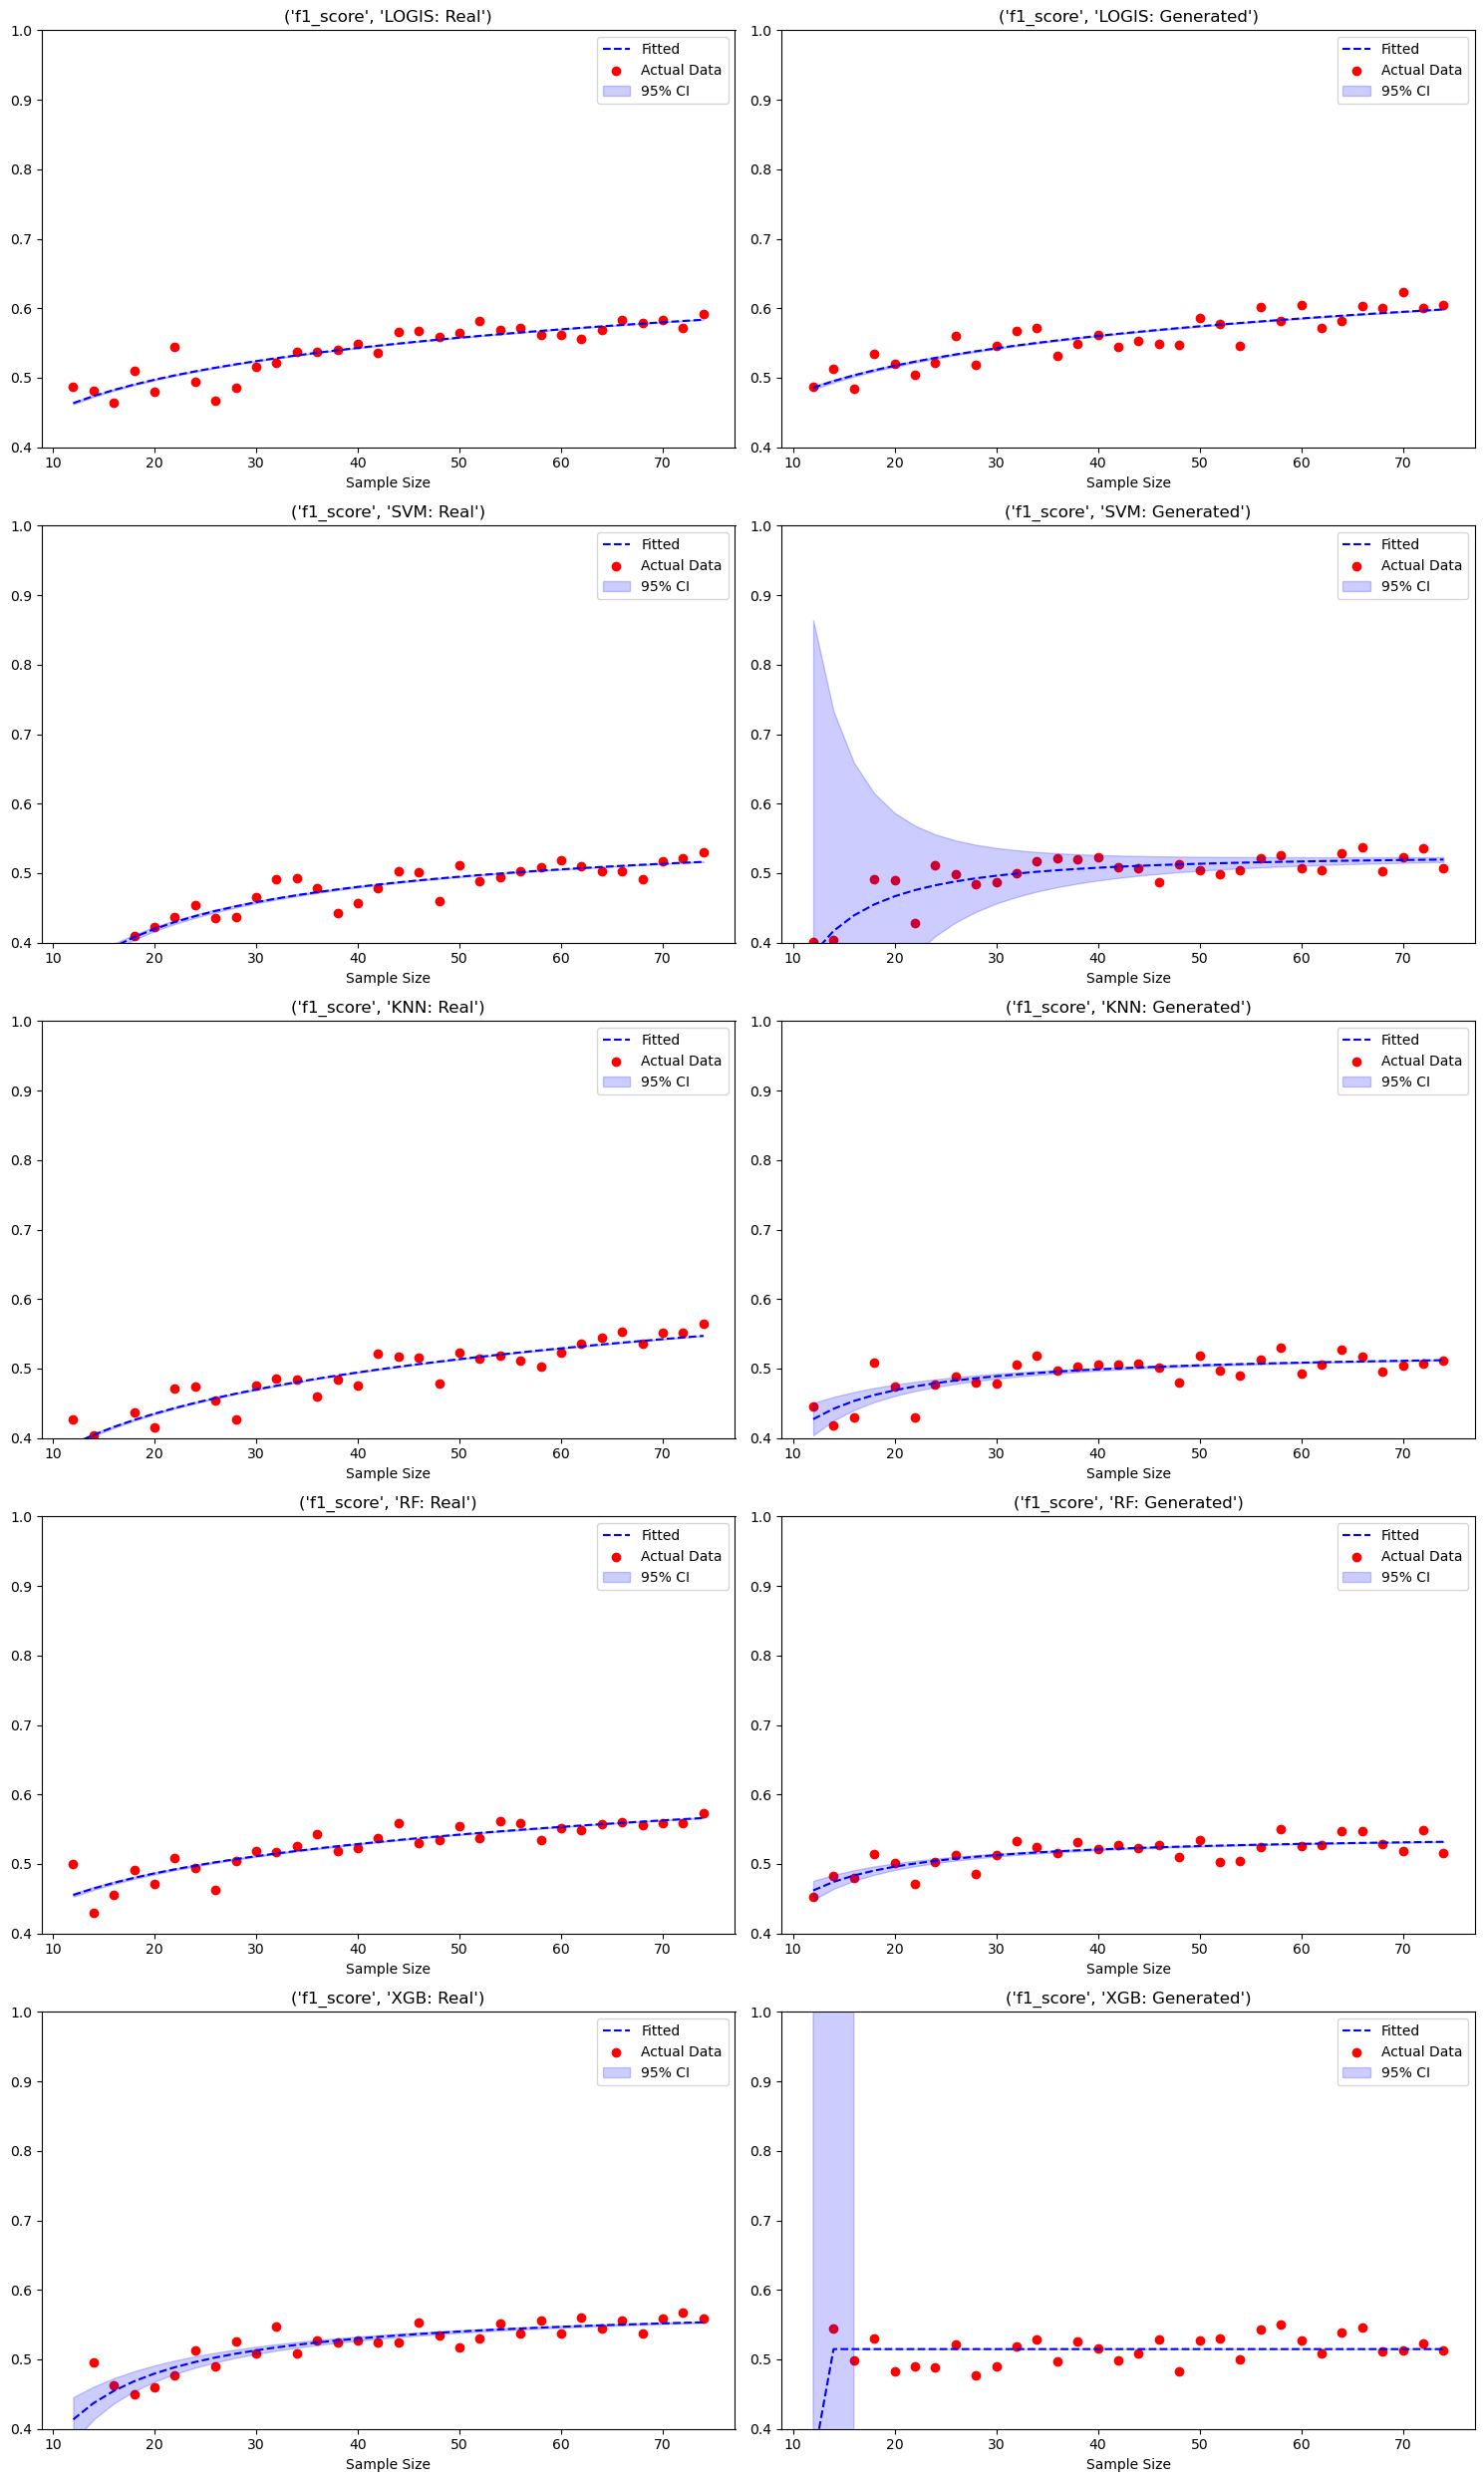

In [30]:
import matplotlib.pyplot as plt
p_acc = vis_classifier(metric_generated=metric_generated,
                       metric_real=metric_real,
                       metric_name='f1_score',
                       n_target=n_target, save = False)